In [1]:
import pandas as pd

# Load the uploaded file
file_path = 'AAPL.csv'
appl_data = pd.read_csv(file_path)

# Display basic information
basic_info = appl_data.info()

# Display first few rows
head_rows = appl_data.head()

# Display summary statistics
summary_stats = appl_data.describe()

from IPython.display import display

# Display the dataframe in the notebook
display(appl_data.head())

basic_info, summary_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+ KB


Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100323  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.095089  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.088110  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090291   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092908   73449600

(None,
                Open          High           Low         Close     Adj Close  \
 count  10409.000000  10409.000000  10409.000000  10409.000000  10409.000000   
 mean      13.959910     14.111936     13.809163     13.966757     13.350337   
 std       30.169244     30.514878     29.835055     30.191696     29.911132   
 min        0.049665      0.049665      0.049107      0.049107      0.038384   
 25%        0.281964      0.287946      0.274554      0.281250      0.234799   
 50%        0.468750      0.477679      0.459821      0.468750      0.386853   
 75%       14.217857     14.364286     14.043571     14.206071     12.188149   
 max      182.630005    182.940002    179.119995    182.009995    181.778397   
 
              Volume  
 count  1.040900e+04  
 mean   3.321778e+08  
 std    3.393344e+08  
 min    0.000000e+00  
 25%    1.247604e+08  
 50%    2.199680e+08  
 75%    4.126108e+08  
 max    7.421641e+09  )

In [2]:
# 1. Check total missing values per column
print(appl_data.isnull().sum())

# 2. Check if *any* missing value exists at all
print("\nAny missing values in the dataset?:", appl_data.isnull().values.any())

# 3. Percentage of missing values per column
print("\nPercentage of missing values per column:")
print((appl_data.isnull().sum() / len(appl_data)) * 100)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Any missing values in the dataset?: False

Percentage of missing values per column:
Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64


In [3]:
missing_info = pd.DataFrame({
    'Total Missing': appl_data.isnull().sum(),
    'Percentage (%)': (appl_data.isnull().sum() / len(appl_data)) * 100
})
print(missing_info)


           Total Missing  Percentage (%)
Date                   0             0.0
Open                   0             0.0
High                   0             0.0
Low                    0             0.0
Close                  0             0.0
Adj Close              0             0.0
Volume                 0             0.0


In [4]:
# Convert 'Date' column to datetime
appl_data['Date'] = pd.to_datetime(appl_data['Date'])

# Extract unique years present in the dataset
unique_years = appl_data['Date'].dt.year.unique()
unique_years.sort()

unique_years

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int32)

In [5]:
# Since the 'Date' column has already been parsed in earlier steps, ensuring it's datetime
appl_data['Date'] = pd.to_datetime(appl_data['Date'])

# Extract the year
appl_data['Year'] = appl_data['Date'].dt.year

# Identify the unique years
unique_years_sorted = sorted(appl_data['Year'].unique())

# Determine the boundaries
first_25_years = unique_years_sorted[:25]
next_10_years = unique_years_sorted[25:35]
remaining_years = unique_years_sorted[35:]
# Define the date for the COVID-19 impact (March 1, 2020)
covid_start_year = 2020

# Split the dataset based on the COVID-19 start year
before_covid = appl_data[appl_data['Year'] < covid_start_year]
after_covid = appl_data[appl_data['Year'] >= covid_start_year]

# Create the three subsets
appl_data_first_25 = appl_data[appl_data['Year'].isin(first_25_years)]
appl_data_next_10 = appl_data[appl_data['Year'].isin(next_10_years)]
appl_data_remaining = appl_data[appl_data['Year'].isin(remaining_years)]

from IPython.display import display

# Display the dataframes in the notebook
print("First 25 Years Dataset:")
display(appl_data_first_25)

print("Next 10 Years Dataset:")
display(appl_data_next_10)

print("Remaining Years Dataset:")
display(appl_data_remaining)

print("Before Covid Dataset:")
display(before_covid)

print("After Covid Dataset:")
display(after_covid)


First 25 Years Dataset:


Date      Open      High       Low     Close  Adj Close     Volume  \
0    1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100323  469033600   
1    1980-12-15  0.122210  0.122210  0.121652  0.121652   0.095089  175884800   
2    1980-12-16  0.113281  0.113281  0.112723  0.112723   0.088110  105728000   
3    1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090291   86441600   
4    1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092908   73449600   
...         ...       ...       ...       ...       ...        ...        ...   
6067 2004-12-27  1.157143  1.163393  1.122857  1.127857   0.965755  559490400   
6068 2004-12-28  1.130357  1.147321  1.108036  1.146071   0.981351  611755200   
6069 2004-12-29  1.139464  1.160357  1.135179  1.150714   0.985327  449562400   
6070 2004-12-30  1.157321  1.161250  1.146786  1.157143   0.990832  345340800   
6071 2004-12-31  1.158750  1.160714  1.143393  1.150000   0.984716  278588800   

      Year  
0     1980  
1     1980  
2     1980  
3     1980  
4     1980  
...    ...  
6067  2004  
6068  2004  
6069  2004  
6070  2004  
6071  2004  

[6072 rows x 8 columns]

Next 10 Years Dataset:


Date       Open       High        Low      Close  Adj Close  \
6072 2005-01-03   1.156786   1.162679   1.117857   1.130179   0.967744   
6073 2005-01-04   1.139107   1.169107   1.124464   1.141786   0.977682   
6074 2005-01-05   1.151071   1.165179   1.143750   1.151786   0.986245   
6075 2005-01-06   1.154821   1.159107   1.130893   1.152679   0.987009   
6076 2005-01-07   1.160714   1.243393   1.156250   1.236607   1.058875   
...         ...        ...        ...        ...        ...        ...   
8584 2014-12-24  28.145000  28.177500  28.002501  28.002501  25.320337   
8585 2014-12-26  28.025000  28.629999  28.002501  28.497499  25.767920   
8586 2014-12-29  28.447500  28.692499  28.424999  28.477501  25.749844   
8587 2014-12-30  28.410000  28.480000  28.027500  28.129999  25.435617   
8588 2014-12-31  28.205000  28.282499  27.552500  27.594999  24.951864   

          Volume  Year  
6072   691992000  2005  
6073  1096810400  2005  
6074   680433600  2005  
6075   705555200  2005  
6076  2227450400  2005  
...          ...   ...  
8584    57918400  2014  
8585   134884000  2014  
8586   110395600  2014  
8587   119526000  2014  
8588   165613600  2014  

[2517 rows x 8 columns]

Remaining Years Dataset:


Date        Open        High         Low       Close   Adj Close  \
8589  2015-01-02   27.847500   27.860001   26.837500   27.332500   24.714510   
8590  2015-01-05   27.072500   27.162500   26.352501   26.562500   24.018263   
8591  2015-01-06   26.635000   26.857500   26.157499   26.565001   24.020523   
8592  2015-01-07   26.799999   27.049999   26.674999   26.937500   24.357338   
8593  2015-01-08   27.307501   28.037500   27.174999   27.972500   25.293213   
...          ...         ...         ...         ...         ...         ...   
10404 2022-03-18  160.509995  164.479996  159.759995  163.979996  163.979996   
10405 2022-03-21  163.509995  166.350006  163.009995  165.380005  165.380005   
10406 2022-03-22  165.509995  169.419998  164.910004  168.820007  168.820007   
10407 2022-03-23  167.990005  172.639999  167.649994  170.210007  170.210007   
10408 2022-03-24  171.059998  174.139999  170.210007  174.070007  174.070007   

          Volume  Year  
8589   212818400  2015  
8590   257142000  2015  
8591   263188400  2015  
8592   160423600  2015  
8593   237458000  2015  
...          ...   ...  
10404  123351200  2022  
10405   95811400  2022  
10406   81532000  2022  
10407   98062700  2022  
10408   90018700  2022  

[1820 rows x 8 columns]

Before Covid Dataset:


Date       Open       High        Low      Close  Adj Close  \
0    1980-12-12   0.128348   0.128906   0.128348   0.128348   0.100323   
1    1980-12-15   0.122210   0.122210   0.121652   0.121652   0.095089   
2    1980-12-16   0.113281   0.113281   0.112723   0.112723   0.088110   
3    1980-12-17   0.115513   0.116071   0.115513   0.115513   0.090291   
4    1980-12-18   0.118862   0.119420   0.118862   0.118862   0.092908   
...         ...        ...        ...        ...        ...        ...   
9842 2019-12-24  71.172501  71.222504  70.730003  71.067497  69.938210   
9843 2019-12-26  71.205002  72.495003  71.175003  72.477501  71.325806   
9844 2019-12-27  72.779999  73.492500  72.029999  72.449997  71.298729   
9845 2019-12-30  72.364998  73.172501  71.305000  72.879997  71.721901   
9846 2019-12-31  72.482498  73.419998  72.379997  73.412498  72.245941   

         Volume  Year  
0     469033600  1980  
1     175884800  1980  
2     105728000  1980  
3      86441600  1980  
4      73449600  1980  
...         ...   ...  
9842   48478800  2019  
9843   93121200  2019  
9844  146266000  2019  
9845  144114400  2019  
9846  100805600  2019  

[9847 rows x 8 columns]

After Covid Dataset:


Date        Open        High         Low       Close   Adj Close  \
9847  2020-01-02   74.059998   75.150002   73.797501   75.087502   73.894318   
9848  2020-01-03   74.287498   75.144997   74.125000   74.357498   73.175911   
9849  2020-01-06   73.447502   74.989998   73.187500   74.949997   73.759010   
9850  2020-01-07   74.959999   75.224998   74.370003   74.597504   73.412117   
9851  2020-01-08   74.290001   76.110001   74.290001   75.797501   74.593033   
...          ...         ...         ...         ...         ...         ...   
10404 2022-03-18  160.509995  164.479996  159.759995  163.979996  163.979996   
10405 2022-03-21  163.509995  166.350006  163.009995  165.380005  165.380005   
10406 2022-03-22  165.509995  169.419998  164.910004  168.820007  168.820007   
10407 2022-03-23  167.990005  172.639999  167.649994  170.210007  170.210007   
10408 2022-03-24  171.059998  174.139999  170.210007  174.070007  174.070007   

          Volume  Year  
9847   135480400  2020  
9848   146322800  2020  
9849   118387200  2020  
9850   108872000  2020  
9851   132079200  2020  
...          ...   ...  
10404  123351200  2022  
10405   95811400  2022  
10406   81532000  2022  
10407   98062700  2022  
10408   90018700  2022  

[562 rows x 8 columns]

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_graph(data, features=['Close'], interval=60):
    plt.figure(figsize=(15, 10))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=interval))
    
    x_dates = data.index  # Now index is already datetime, no need to convert
    
    for f in features:
        plt.plot(x_dates, data[f], label=f)
    
    plt.xticks(rotation=90)
    plt.xlabel('Time Scale')
    plt.ylabel('scaled USD')
    plt.legend()
    plt.show()

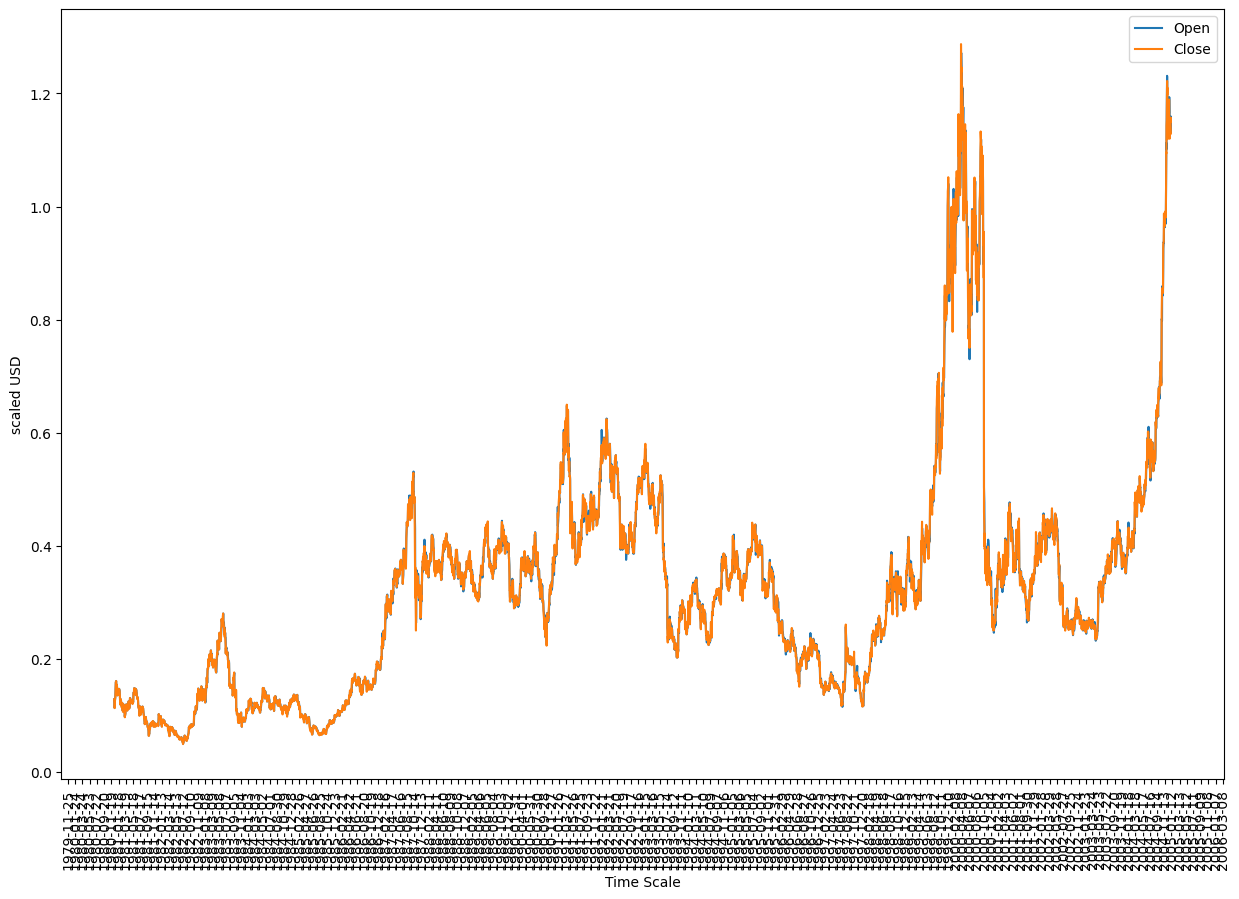

In [7]:
# Example for first 25 years segment for open and close
appl_data_first_25.set_index('Date', inplace=True)

plot_graph(appl_data_first_25, features=['Open', 'Close'])

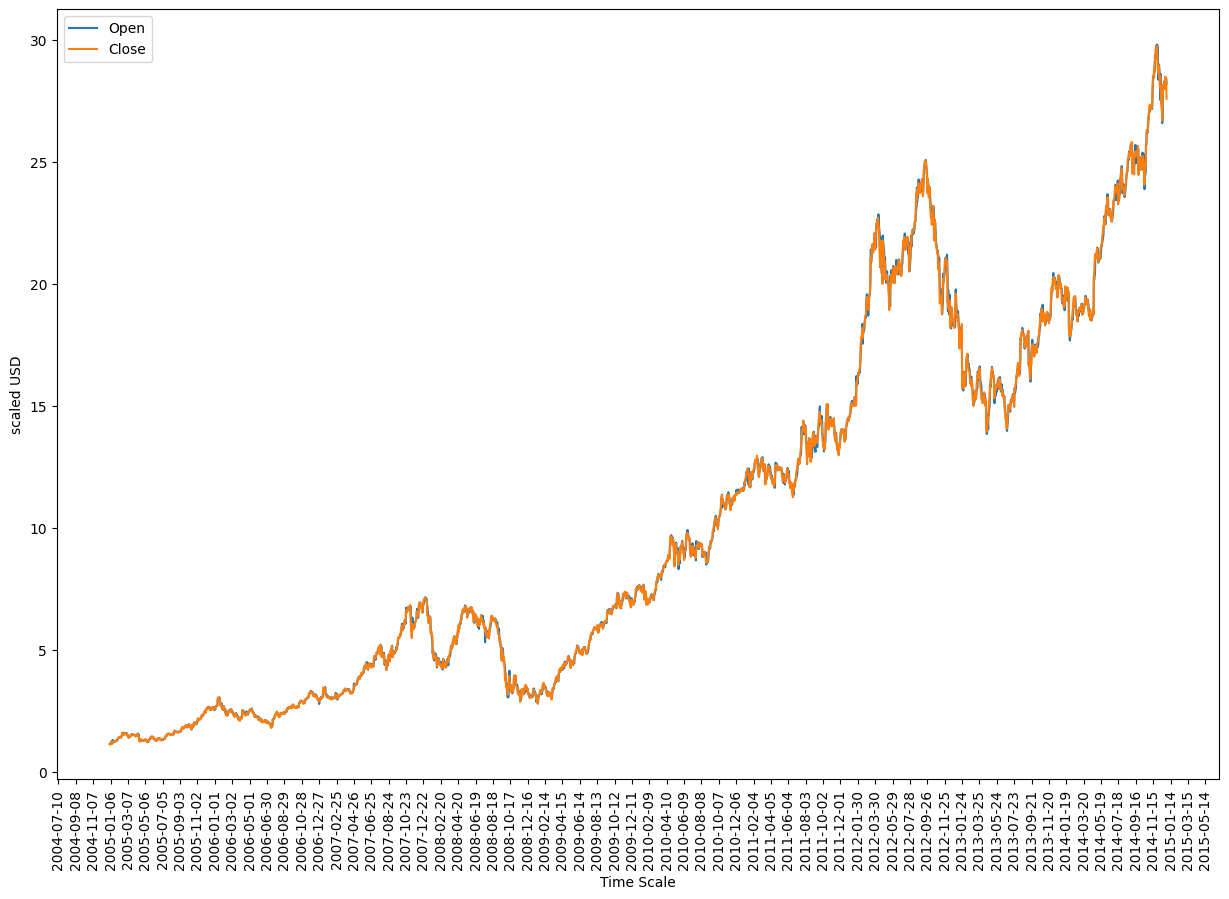

In [8]:
# Example for next 10 years segment for open and close
appl_data_next_10.set_index('Date', inplace=True)

plot_graph(appl_data_next_10, features=['Open', 'Close'])

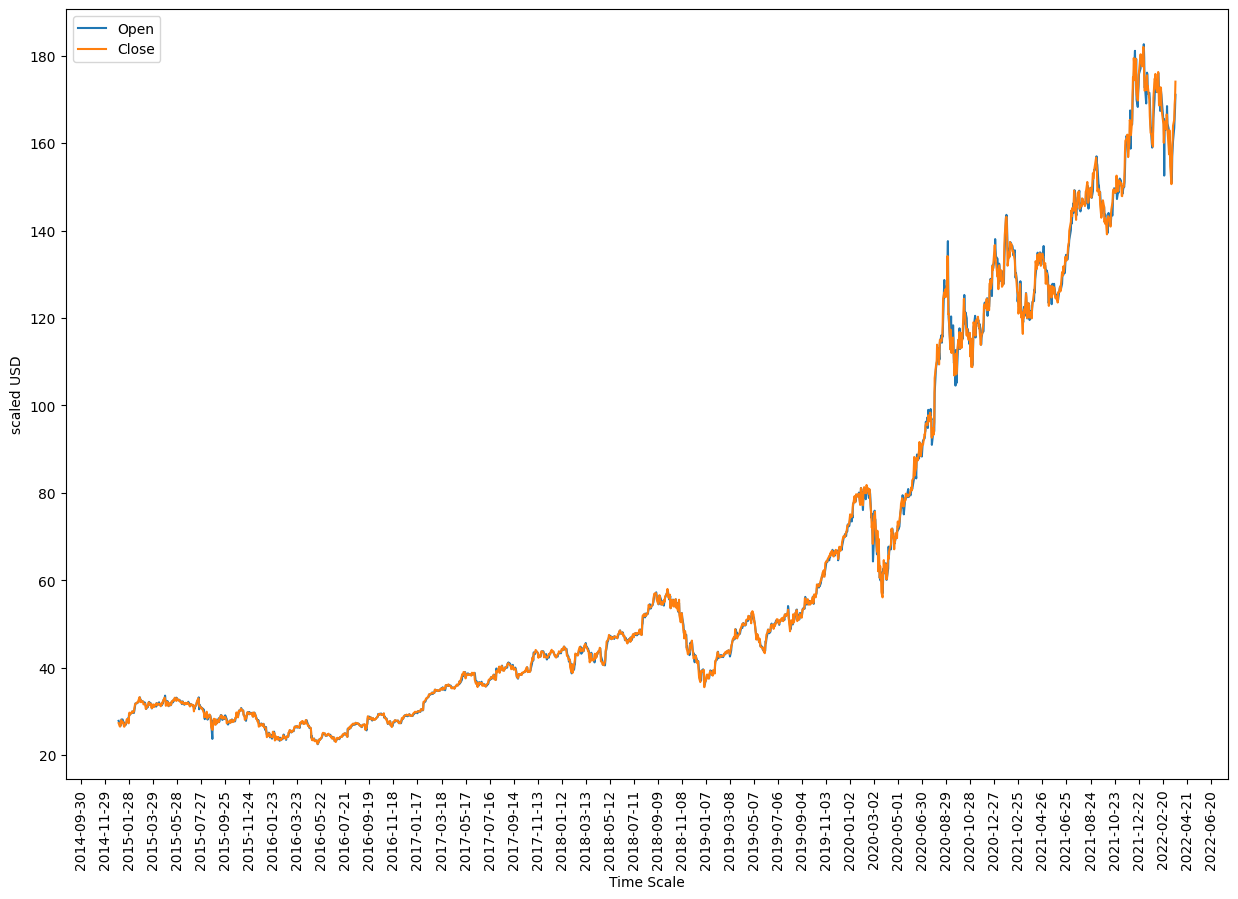

In [9]:
# Example for the remaining years segment for open and close
appl_data_remaining.set_index('Date', inplace=True)

plot_graph(appl_data_remaining, features=['Open', 'Close'])

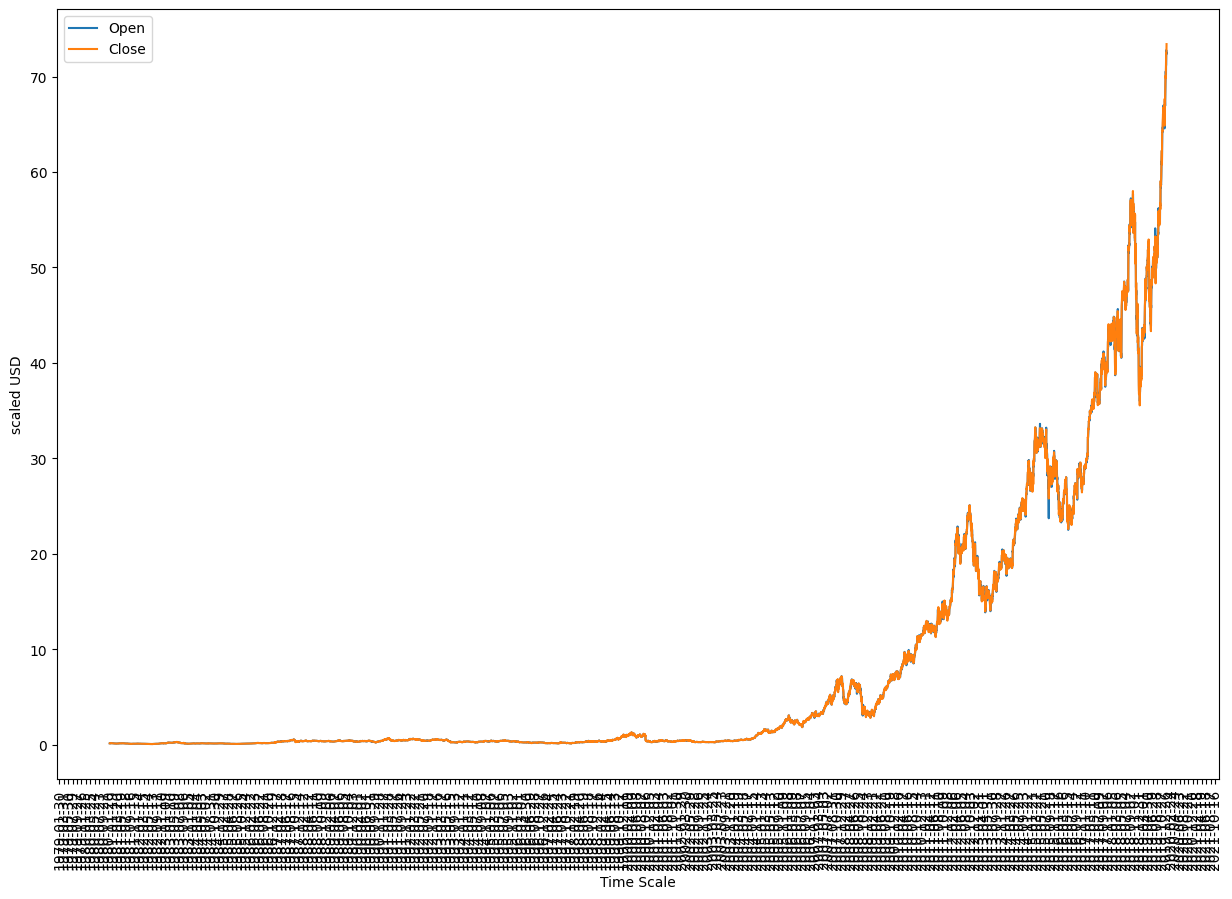

In [10]:
# Example for before covid yeaars segment for open and close
before_covid.set_index('Date', inplace=True)

plot_graph(before_covid, features=['Open', 'Close'])

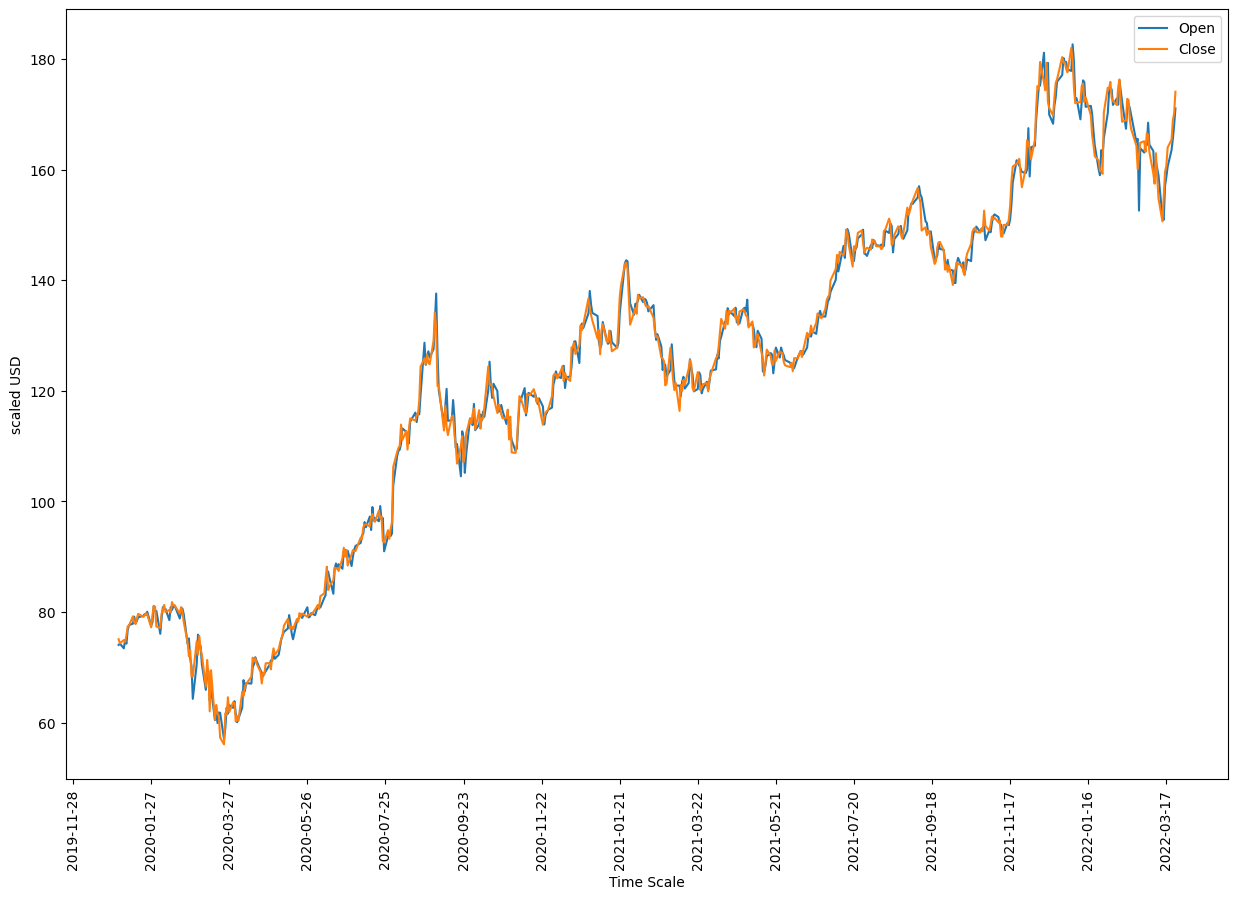

In [11]:
# Example for after covid years segment for open and close
after_covid.set_index('Date', inplace=True)

plot_graph(after_covid, features=['Open', 'Close'])

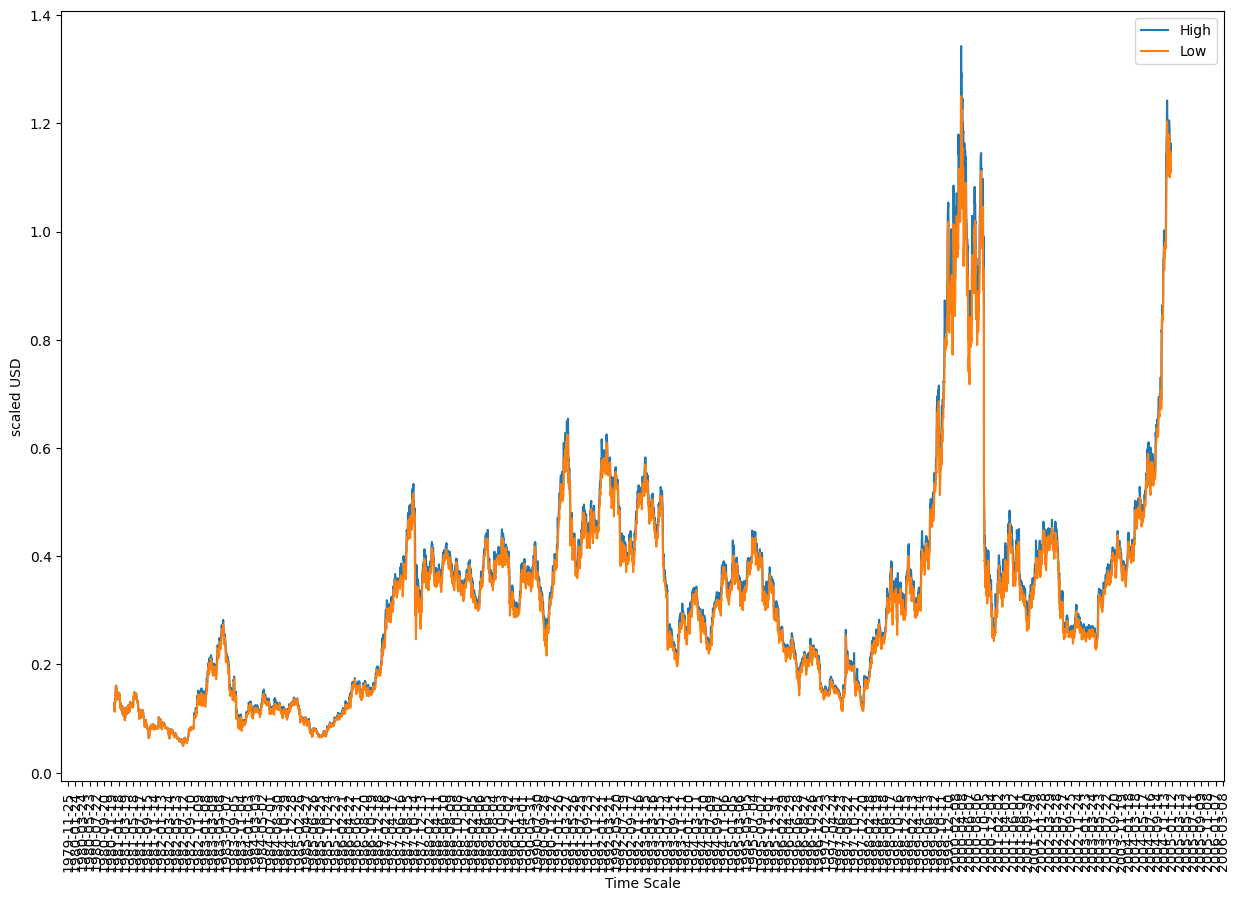

In [12]:
# Example for first 25 years segment for high and low
plot_graph(appl_data_first_25, features=['High', 'Low'])

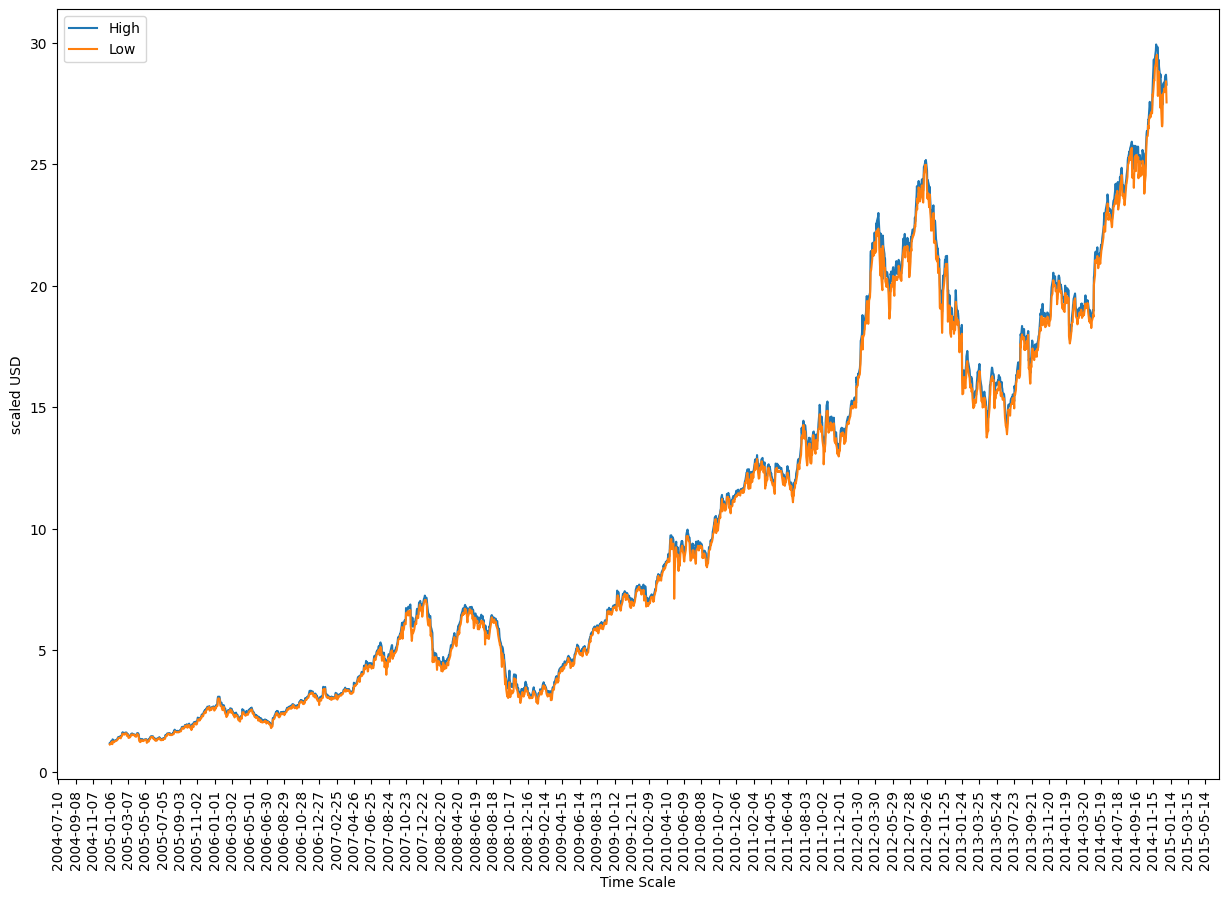

In [13]:
# Example for next 10 years segment for high and low
plot_graph(appl_data_next_10, features=['High', 'Low'])

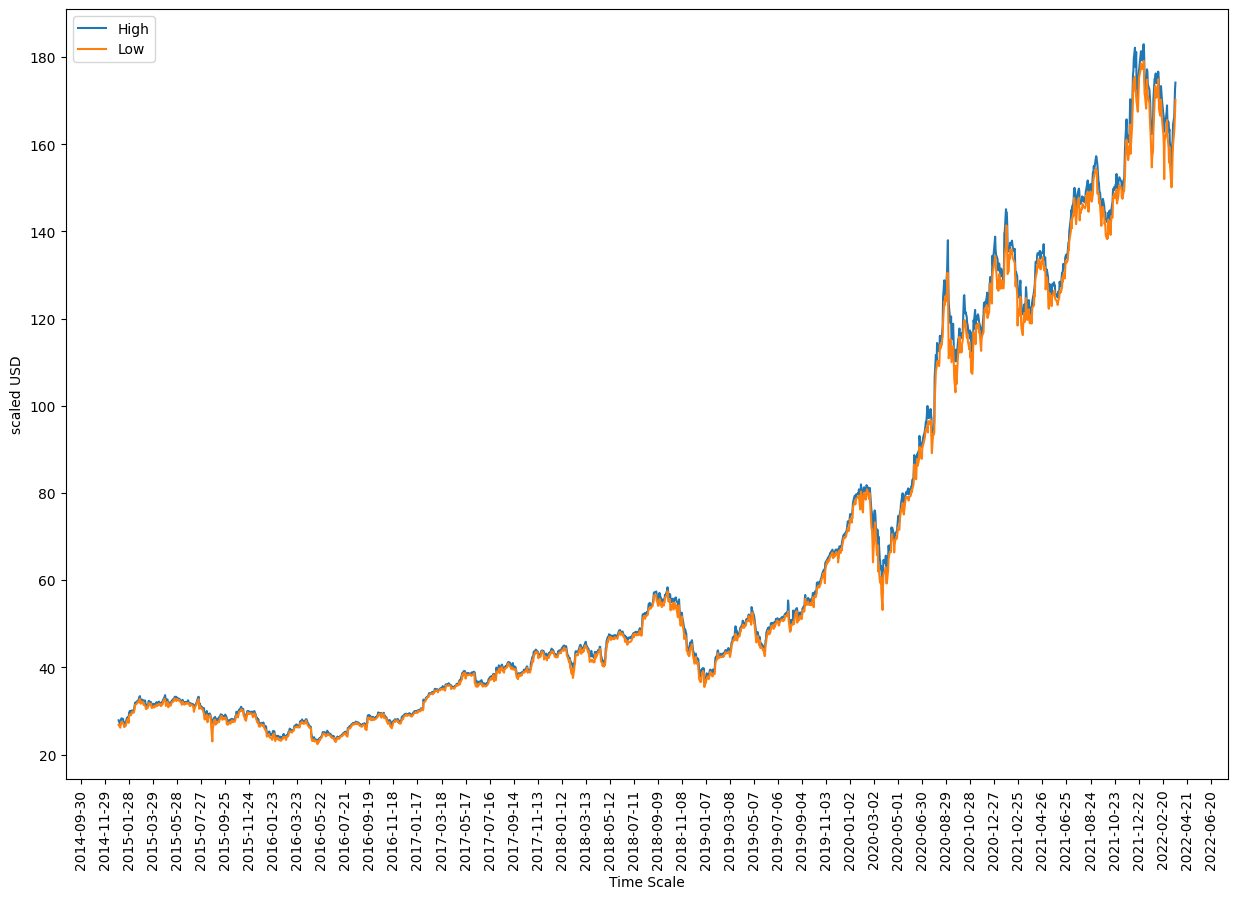

In [14]:
# Example for remaining years for high and low
plot_graph(appl_data_remaining, features=['High', 'Low'])

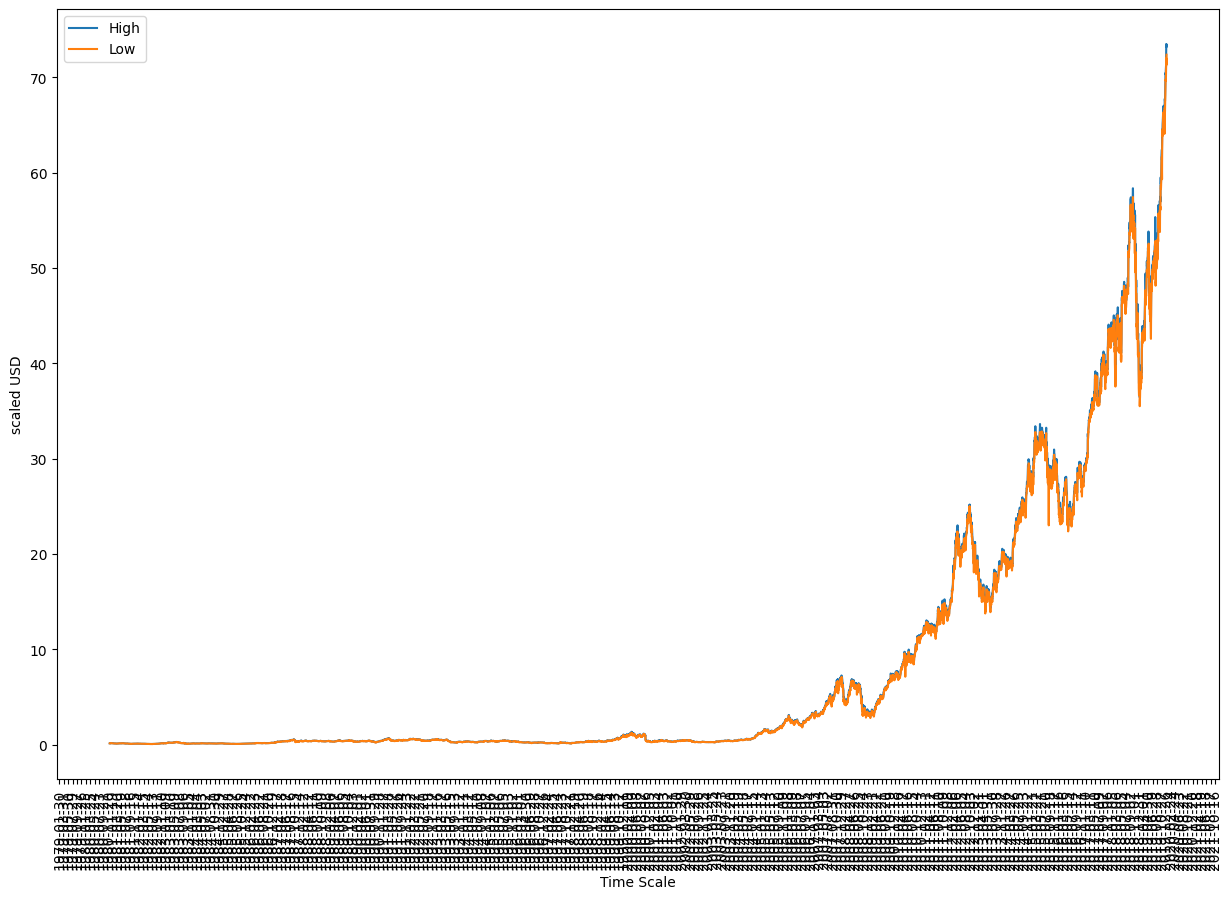

In [15]:
# Example for before covid years segment for high and low
plot_graph(before_covid, features=['High', 'Low'])

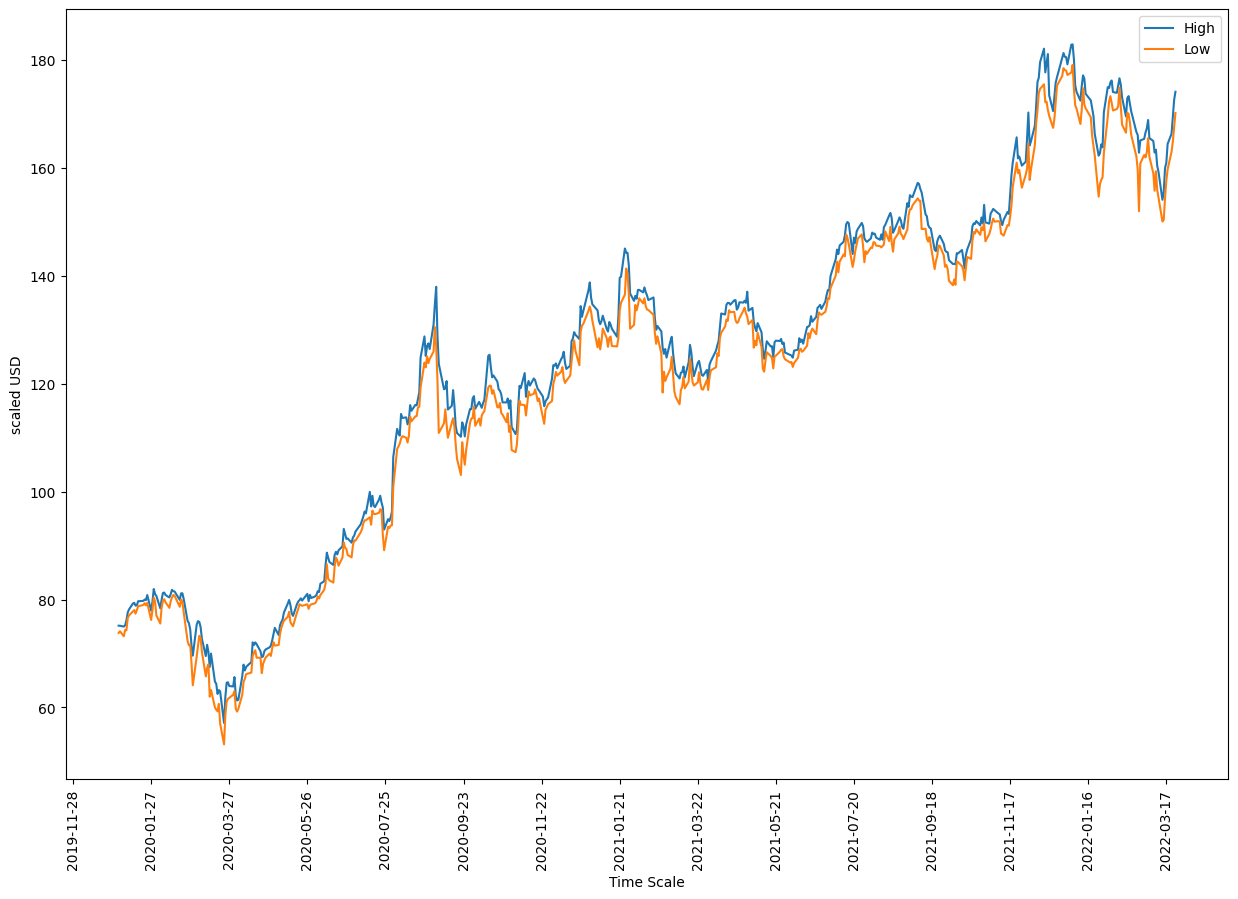

In [16]:
# Example for after covid years segment for high and low
plot_graph(after_covid, features=['High', 'Low'])

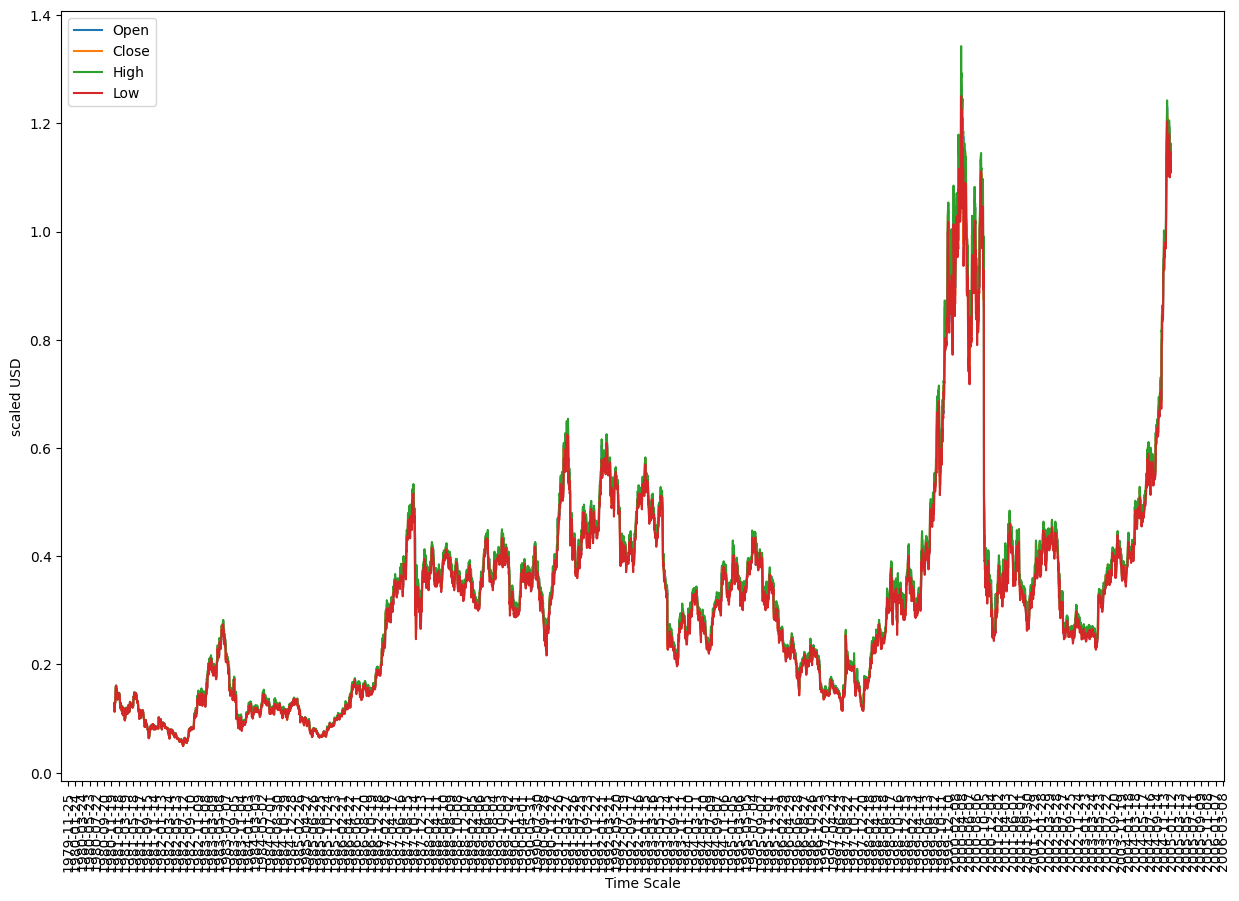

In [17]:
# Example for first 25 years segment for open,close,high and low
plot_graph(appl_data_first_25, features=['Open','Close','High', 'Low'])

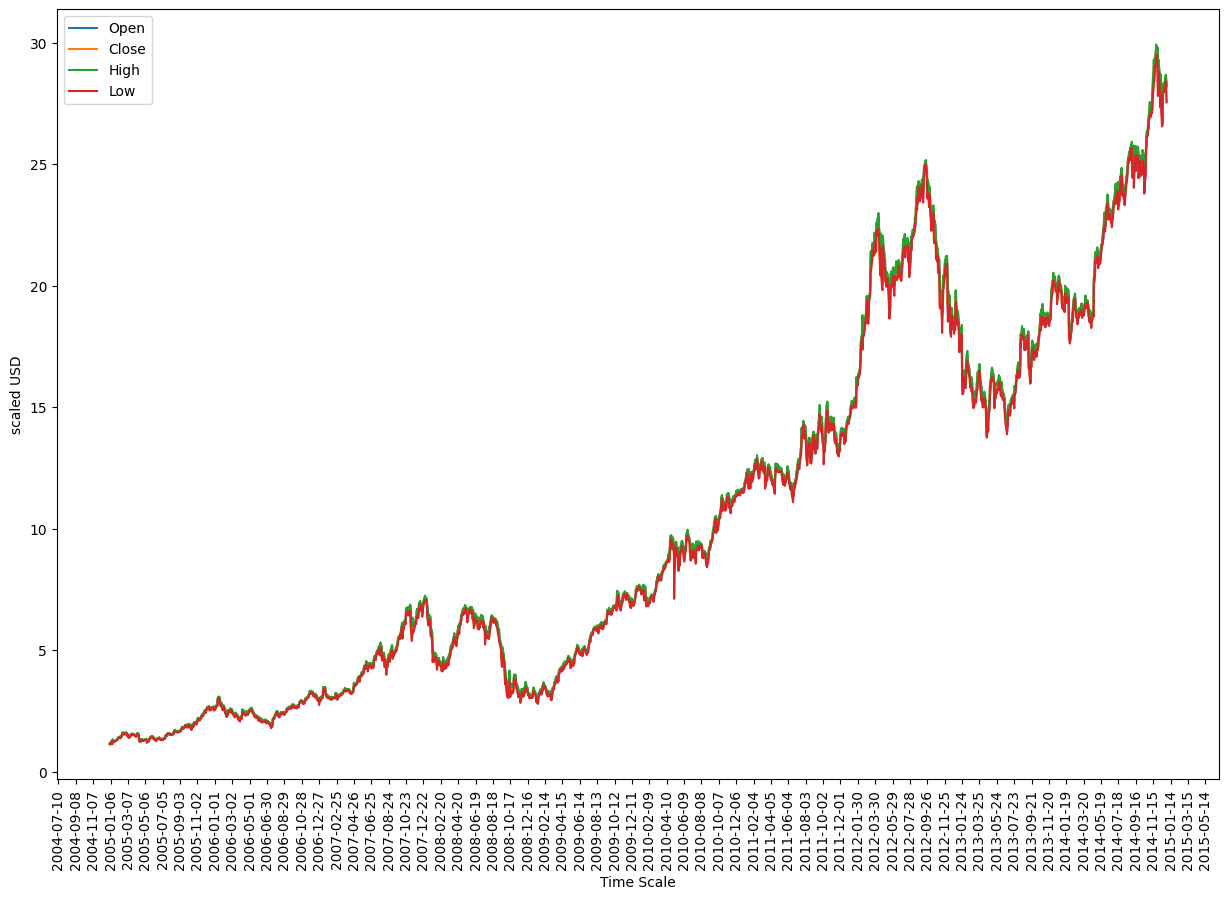

In [18]:
# Example for next 10 years segment for open,close,high and low
plot_graph(appl_data_next_10, features=['Open','Close','High', 'Low'])

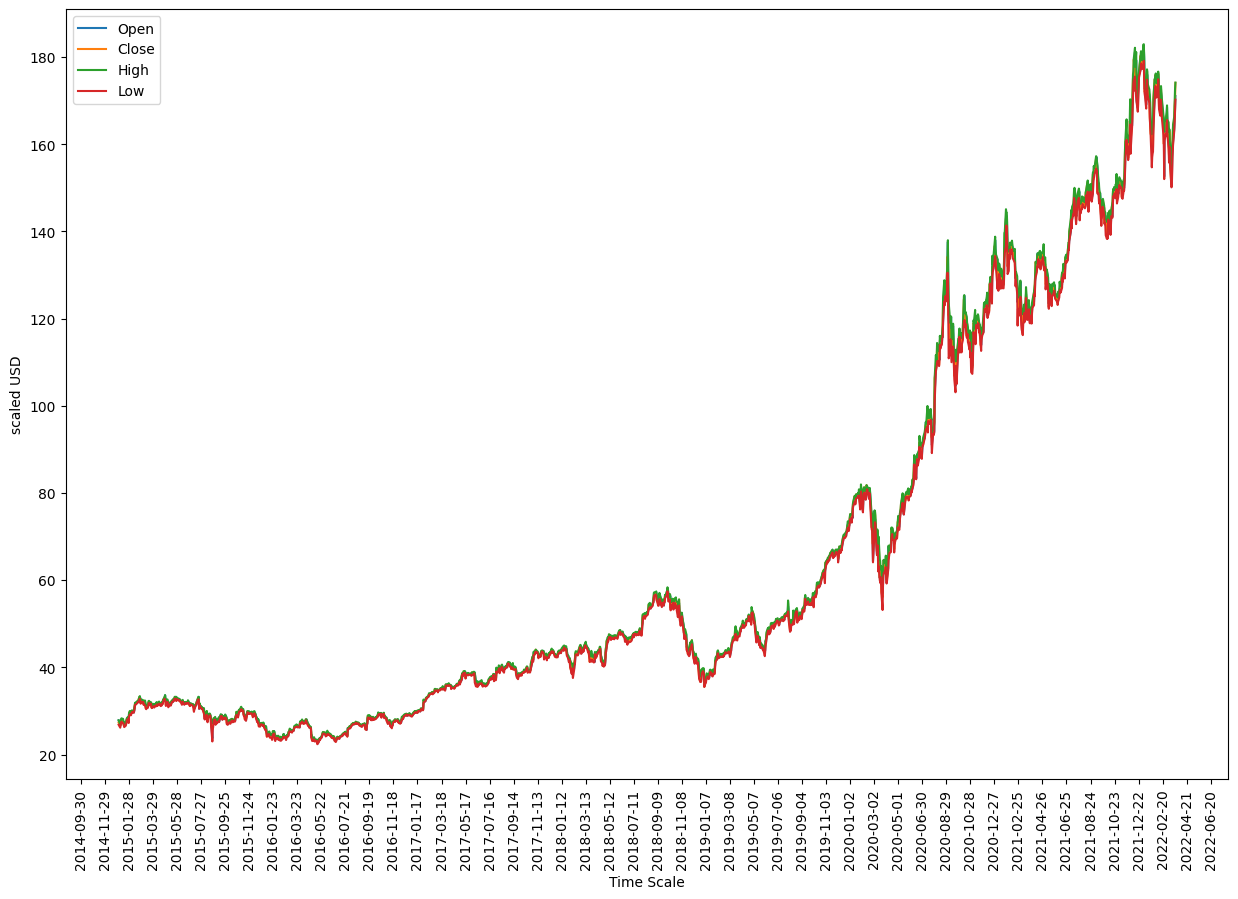

In [19]:
# Example for remaining years for open,close,high and low
plot_graph(appl_data_remaining, features=['Open','Close','High','Low'])

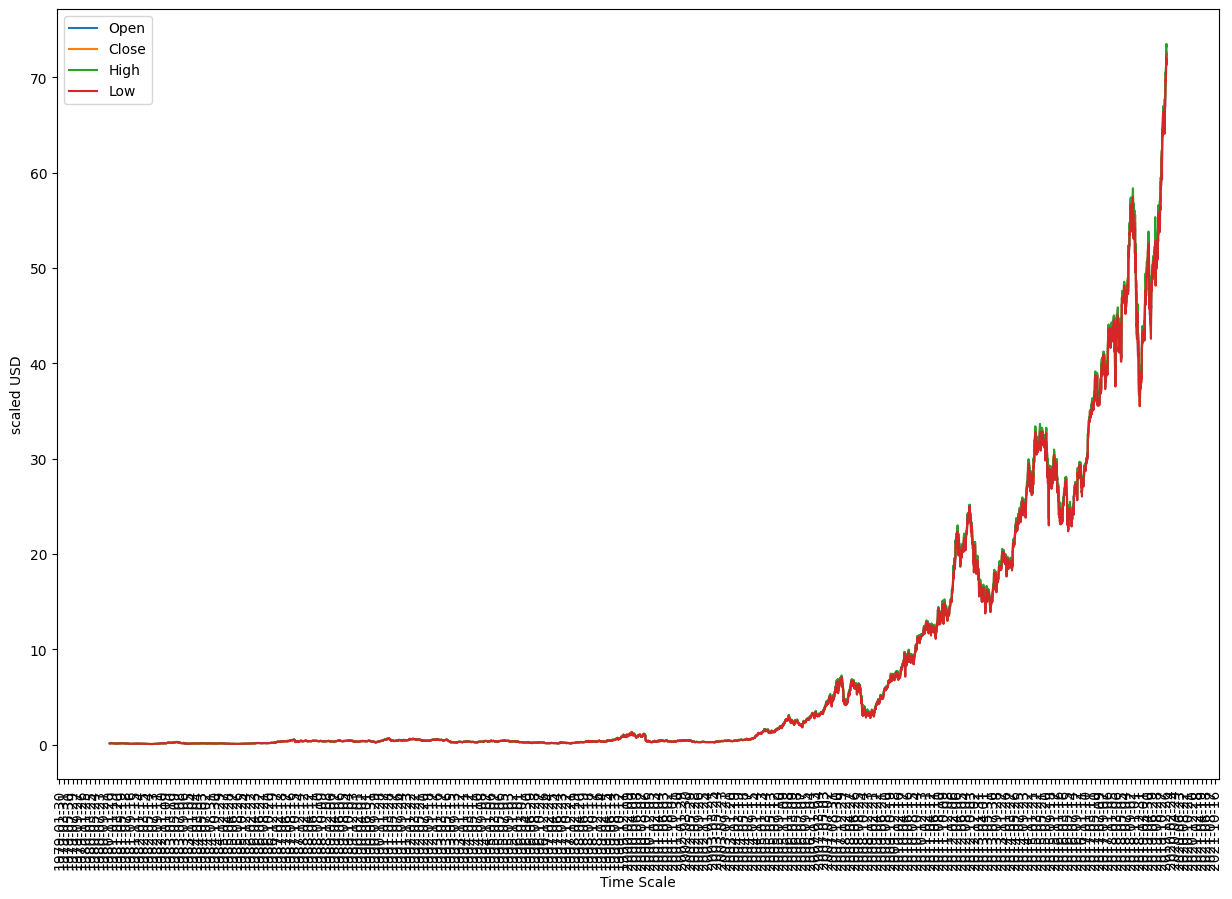

In [20]:
# Example for before covid years segment for open,close,high and low
plot_graph(before_covid, features=['Open','Close','High', 'Low'])

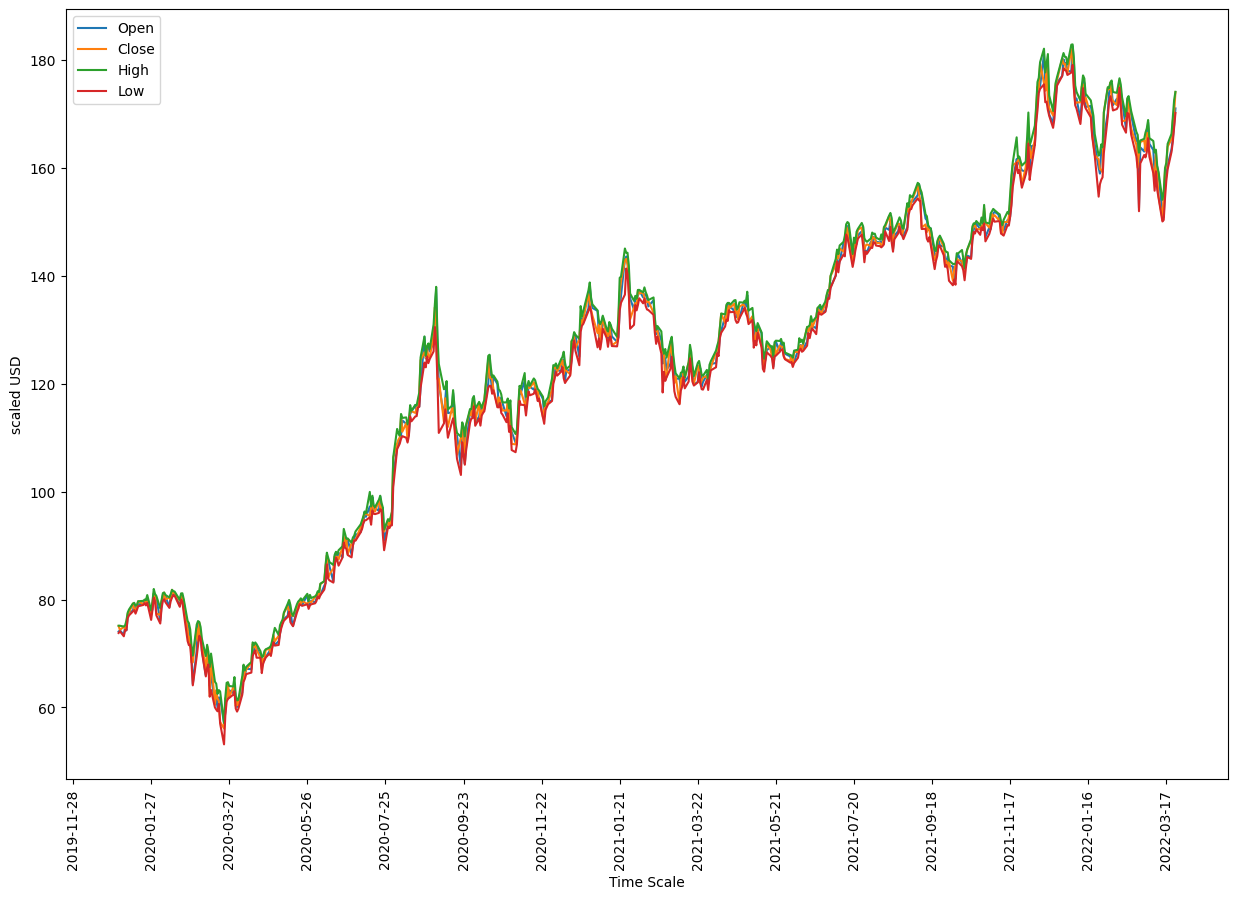

In [21]:
# Example for after covid years segment for open,close,high and low
plot_graph(after_covid, features=['Open','Close','High', 'Low'])

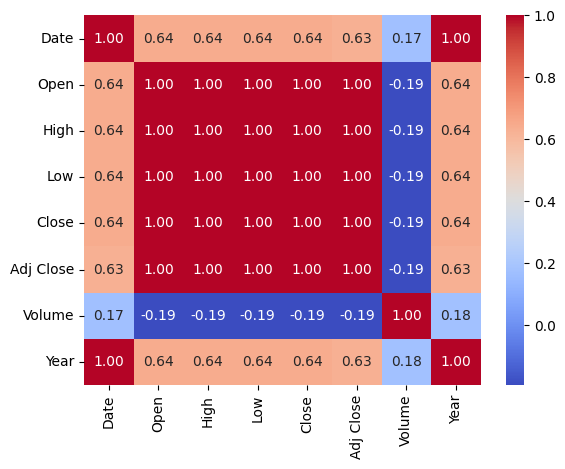

In [22]:
# Correlation matrix Heatmap
import seaborn as sns
correlation_matrix = appl_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [23]:
import numpy as np

# Function to split the dataset into sequences for LSTM input
def datasplit_lstm(lstm_data, n_steps):
     lstm_X,lstm_Y = [], []  # Lists to store the input sequences and output values
    
    # Loop through the dataset to create sequences of the specified time steps
     for i in range(len(lstm_data) - n_steps + 1):
        # Append a sequence of input features (excluding the last column) to the lstm_X list
        lstm_X.append(lstm_data[i:i + n_steps, :-1])
        # Append the target value (last column) of the sequence to the lstm_Y list
        lstm_Y.append(lstm_data[i + n_steps - 1, -1])
    
    # Return the inputs (lstm_X) and outputs (lstm_Y) as numpy arrays for easier manipulation
     return np.array(lstm_X), np.array(lstm_Y)


In [24]:
import sklearn
from sklearn.preprocessing import StandardScaler

# Function to prepare training and testing data for LSTM model
def train_test_lstm(lstm_data, n_steps=2, train_split=0.8):
    # Select the target column ('Close') and the feature columns (first 3 columns)
    Y = appl_data['Close']
    X = appl_data.iloc[:, 0:3]  # Select features (columns 0, 1, and 2)
    # We will scale only numeric columns (e.g., 'Close', 'Open', etc.)
    numeric_cols = X.select_dtypes(include=[np.number]).columns  # Select numeric columns only
    X_numeric = X[numeric_cols]  # Only use numeric columns for scaling
    
    # Standardize the feature data (scaling the features)
    scaler = StandardScaler()  # Initialize StandardScaler to normalize the features
    X_scaled = scaler.fit_transform(X_numeric.values)  # Apply scaling to the numeric feature data
    X_scaled = pd.DataFrame(columns=X_numeric.columns, data=X_scaled, index=X.index)  # Create a DataFrame with the scaled features

    # Generate input sequences and target values for the LSTM model
    lstm_X1, lstm_Y1 = datasplit_lstm(X_scaled.values, n_steps=n_steps)
    
    # Calculate the split index based on the provided train-test split ratio(80:20)
    split_index = int(np.ceil(len(lstm_X1) * train_split))  # Calculate where the training data ends
    
    # Get the date index for the features
    date_index = X_scaled.index

    # Split the data into training and testing datasets based on the split index
    X_train, X_test = lstm_X1[:split_index], lstm_X1[split_index:]  # Training and testing features
    Y_train, Y_test = lstm_Y1[:split_index], lstm_Y1[split_index:]  # Training and testing targets
    X_train_Date, X_test_Date = date_index[:split_index], date_index[split_index:]  # Corresponding dates for training and testing data

    # Print the shapes of the actual and split datasets 
    print("Actual feature data shape  :", lstm_X1.shape)
    print("Actual target data shape   :", lstm_Y1.shape)
    print("Training feature data shape:", X_train.shape)
    print("Training target data shape :", Y_train.shape)
    print("Testing feature data shape :", X_test.shape)
    print("Testing target data shape  :", Y_test.shape)
    
    # Return the training and testing datasets along with their corresponding dates
    return X_train, X_test, Y_train, Y_test, X_train_Date, X_test_Date


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Function to create and compile an LSTM model for time-series prediction
def build_lstm_model(lstm_data, 
                    lstm_units=32, 
                    lstm_activation='relu', 
                    lstm_return_sequences=False, 
                    lstm_compile_loss='mean_squared_error', 
                    lstm_compile_optimizer='adam', 
                    n_steps=2, train_split=0.8):
    
    # Get the training and testing datasets using the previously defined function
    X_train, X_test, Y_train, Y_test, X_train_Date, X_test_Date = train_test_lstm(
        lstm_data, n_steps=n_steps, train_split=train_split
    )
    
    # Initialize the LSTM model as a Sequential model
    lstm_model = Sequential()

    # Add the LSTM layer
    # The input shape is set based on the shape of the training data (X_train)
    lstm_model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    lstm_model.add(LSTM(lstm_units, activation=lstm_activation, return_sequences=lstm_return_sequences))
    
    # Add a Dense layer for output (1 neuron, as we are predicting a single value)
    lstm_model.add(Dense(1))

    # Compile the model with specified loss function and optimizer
    lstm_model.compile(loss=lstm_compile_loss, optimizer=lstm_compile_optimizer)
    
    # Print the model summary to display its architecture
    print("LSTM Model Summary: ")
    print(lstm_model.summary())
    
    # Return the compiled model and the training/test datasets
    return lstm_model, X_train, X_test, Y_train, Y_test, X_train_Date, X_test_Date


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Function to train and predict using the LSTM model
def predict_lstm(lstm_data, 
                       lstm_units=32, 
                       lstm_activation='relu',
                       lstm_return_sequences=False,
                       lstm_compile_loss='mean_squared_error',
                       lstm_compile_optimizer='adam',
                       n_steps=2, epochs=50, batch_size=4, 
                       verbose=2, shuffle=False, train_split=0.8):
    
    # Get the LSTM model, and train/test datasets from the previous function
    lstm_model, X_train, X_test, Y_train, Y_test, X_train_Date, X_test_Date = build_lstm_model(
        lstm_data, 
        lstm_units=lstm_units, 
        lstm_activation=lstm_activation, 
        lstm_return_sequences=lstm_return_sequences, 
        lstm_compile_loss=lstm_compile_loss, 
        lstm_compile_optimizer=lstm_compile_optimizer, 
        n_steps=n_steps, 
        train_split=train_split
    )
    
    # Train the LSTM model on the training data
    train_history = lstm_model.fit(
        X_train, 
        Y_train, 
        epochs=epochs, 
        batch_size=batch_size, 
        verbose=verbose, 
        shuffle=shuffle
    )
    
    # Plot the training loss against the number of epochs
    plt.plot(train_history.history['loss'])
    plt.title('Training Loss vs. Number of Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training Loss'], loc='upper right')
    plt.show()
    
    # Make predictions on the test data using the trained LSTM model
    Y_pred_lstm = lstm_model.predict(X_test)
    
    # Calculate the performance metrics: RMSE and MAPE
    MSE = mean_squared_error(Y_test, Y_pred_lstm) # Mean Squared Error
    RMSE = np.sqrt(MSE) # Root Mean Squared Error
    MAPE = mean_absolute_percentage_error(Y_test, Y_pred_lstm)    # Mean Absolute Percentage Error
    
    # Print the calculated metrics
    print('RMSE:', RMSE)
    print("MAPE:", MAPE)
    
    # Return the trained LSTM model, predictions, and actual test values
    return lstm_model, Y_pred_lstm, Y_test


In [27]:
# Actual Vs Predicted plot function for lstm
def plot_predicted_vs_actual (predicted, actual):
    plt.figure(figsize=(15,10))
    plt.plot(range(predicted.shape[0]), predicted, label="Predicted")
    plt.plot(range(actual.shape[0]), actual, label="Actual")
    plt.xlabel('Time')
    plt.ylabel('Scaled USD')
    plt.legend()
    plt.show()

Actual feature data shape  : (10408, 2, 1)
Actual target data shape   : (10408,)
Training feature data shape: (8327, 2, 1)
Training target data shape : (8327,)
Testing feature data shape : (2081, 2, 1)
Testing target data shape  : (2081,)
LSTM Model Summary: 


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2082/2082 - 10s - 5ms/step - loss: 0.0051
Epoch 2/50
2082/2082 - 10s - 5ms/step - loss: 7.8738e-04
Epoch 3/50
2082/2082 - 7s - 3ms/step - loss: 1.4937e-04
Epoch 4/50
2082/2082 - 10s - 5ms/step - loss: 5.3111e-05
Epoch 5/50
2082/2082 - 7s - 3ms/step - loss: 2.7704e-05
Epoch 6/50
2082/2082 - 6s - 3ms/step - loss: 2.1226e-05
Epoch 7/50
2082/2082 - 11s - 5ms/step - loss: 1.9427e-05
Epoch 8/50
2082/2082 - 11s - 5ms/step - loss: 2.0968e-05
Epoch 9/50
2082/2082 - 10s - 5ms/step - loss: 2.3363e-05
Epoch 10/50
2082/2082 - 6s - 3ms/step - loss: 2.9479e-05
Epoch 11/50
2082/2082 - 6s - 3ms/step - loss: 3.5782e-05
Epoch 12/50
2082/2082 - 6s - 3ms/step - loss: 4.0576e-05
Epoch 13/50
2082/2082 - 7s - 3ms/step - loss: 4.1159e-05
Epoch 14/50
2082/2082 - 10s - 5ms/step - loss: 3.9436e-05
Epoch 15/50
2082/2082 - 6s - 3ms/step - loss: 4.1225e-05
Epoch 16/50
2082/2082 - 10s - 5ms/step - loss: 4.2501e-05
Epoch 17/50
2082/2082 - 10s - 5ms/step - loss: 4.0991e-05
Epoch 18/50
2082/2082 - 11s - 

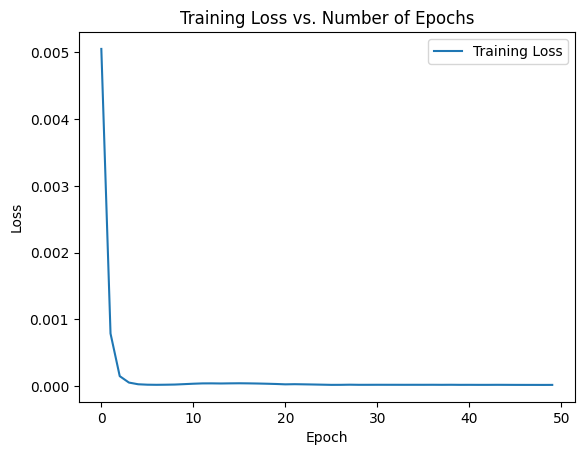

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
RMSE: 2.372282221963321
MAPE: 0.540579048116718


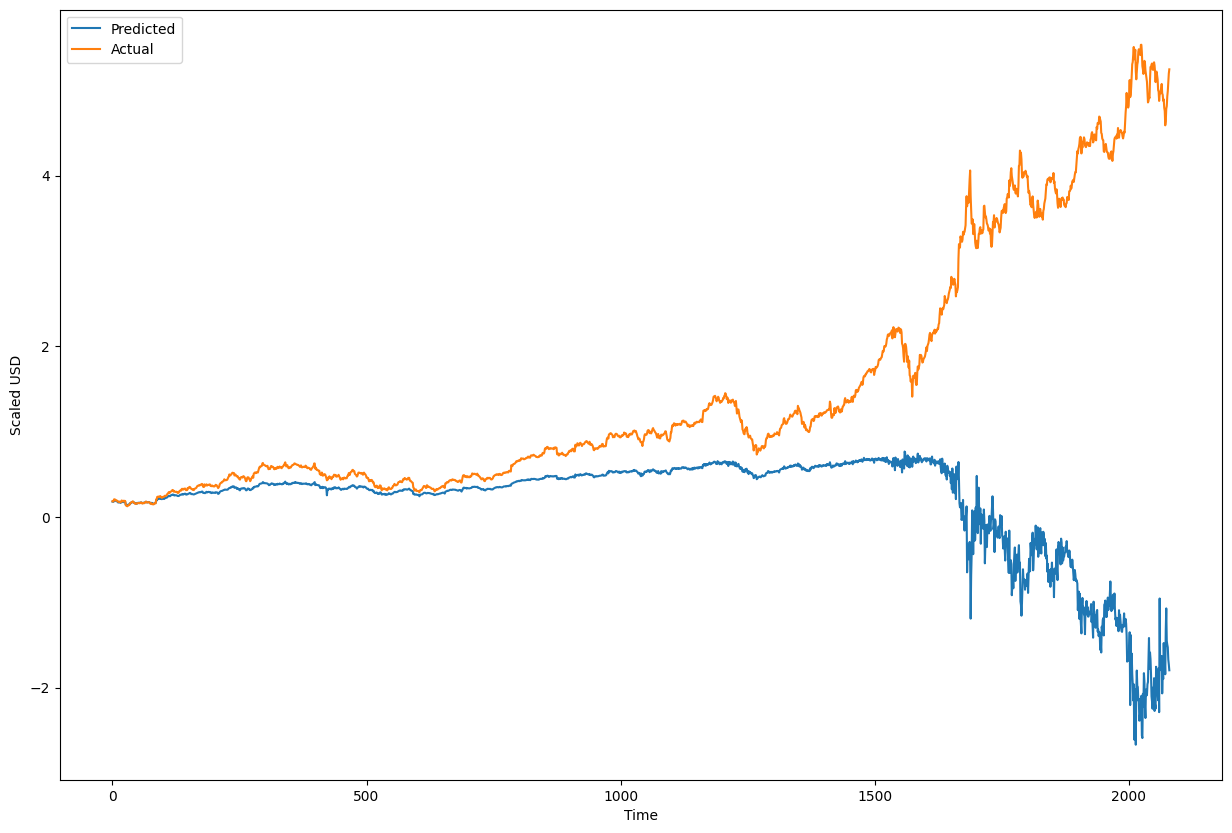

In [28]:
lstm_model, Y_pred_lstm, Y_test = predict_lstm(appl_data)
plot_predicted_vs_actual(Y_pred_lstm, Y_test)

Actual feature data shape  : (10400, 10, 1)
Actual target data shape   : (10400,)
Training feature data shape: (8320, 10, 1)
Training target data shape : (8320,)
Testing feature data shape : (2080, 10, 1)
Testing target data shape  : (2080,)
LSTM Model Summary: 


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2080/2080 - 12s - 6ms/step - loss: 0.0016
Epoch 2/50
2080/2080 - 9s - 4ms/step - loss: 3.3996e-04
Epoch 3/50
2080/2080 - 9s - 4ms/step - loss: 1.7771e-04
Epoch 4/50
2080/2080 - 9s - 4ms/step - loss: 1.1964e-04
Epoch 5/50
2080/2080 - 10s - 5ms/step - loss: 1.1407e-04
Epoch 6/50
2080/2080 - 9s - 4ms/step - loss: 8.9107e-05
Epoch 7/50
2080/2080 - 10s - 5ms/step - loss: 8.8987e-05
Epoch 8/50
2080/2080 - 9s - 4ms/step - loss: 8.1451e-05
Epoch 9/50
2080/2080 - 10s - 5ms/step - loss: 9.5123e-05
Epoch 10/50
2080/2080 - 10s - 5ms/step - loss: 7.2812e-05
Epoch 11/50
2080/2080 - 9s - 4ms/step - loss: 7.2587e-05
Epoch 12/50
2080/2080 - 10s - 5ms/step - loss: 6.4962e-05
Epoch 13/50
2080/2080 - 10s - 5ms/step - loss: 5.7758e-05
Epoch 14/50
2080/2080 - 10s - 5ms/step - loss: 4.9201e-05
Epoch 15/50
2080/2080 - 9s - 4ms/step - loss: 5.8131e-05
Epoch 16/50
2080/2080 - 10s - 5ms/step - loss: 5.1369e-05
Epoch 17/50
2080/2080 - 10s - 5ms/step - loss: 6.5424e-05
Epoch 18/50
2080/2080 - 11s -

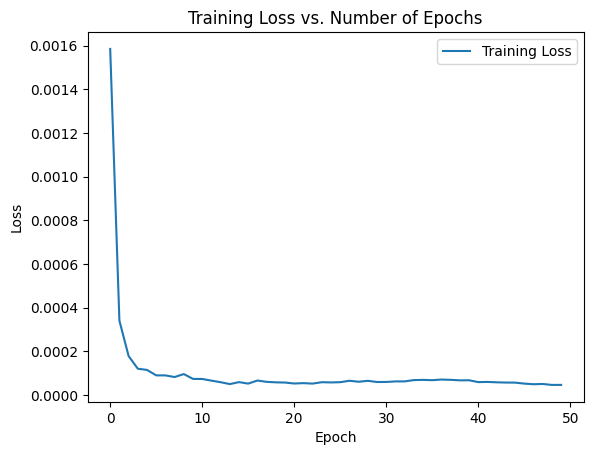

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
RMSE: 0.5318595815047552
MAPE: 0.3781650995077252


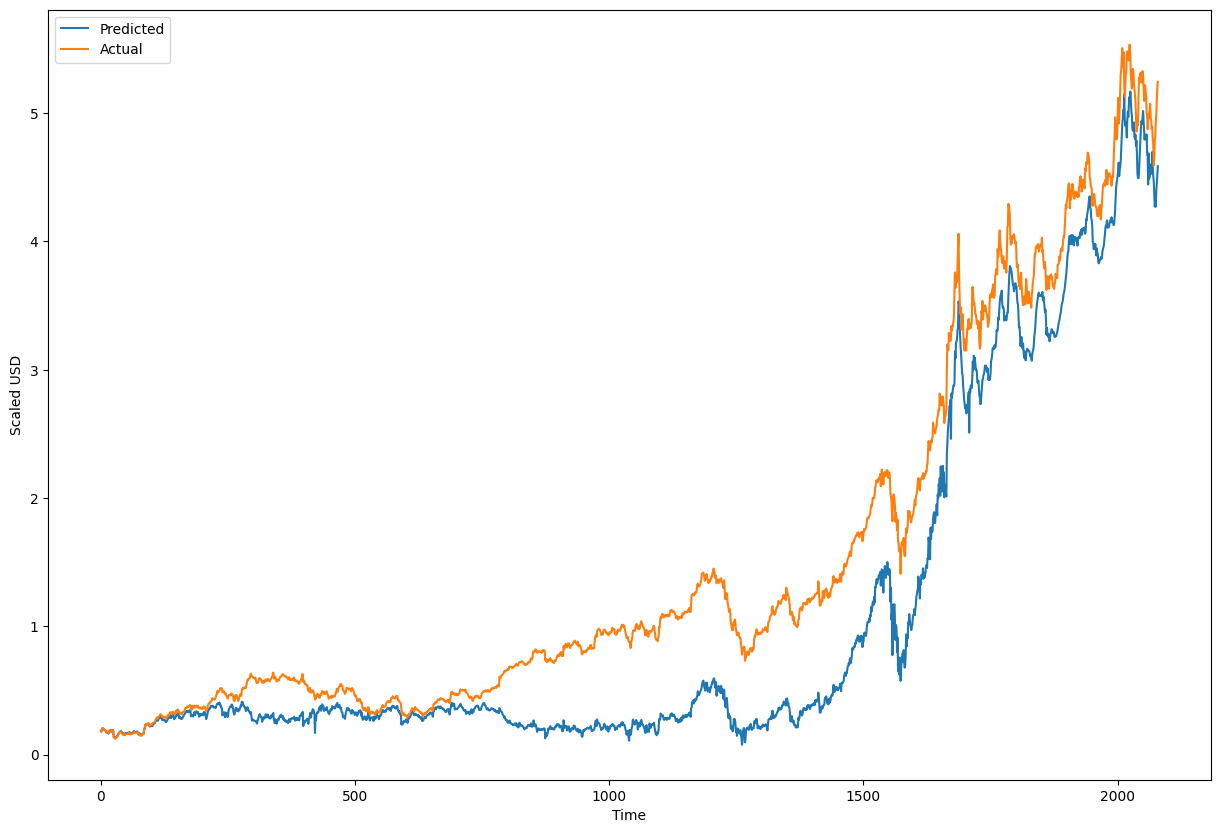

In [29]:
lstm_model1, Y_pred_lstm1, Y_test1 = predict_lstm(appl_data,n_steps=10)
plot_predicted_vs_actual(Y_pred_lstm1, Y_test1)

Actual feature data shape  : (10408, 2, 1)
Actual target data shape   : (10408,)
Training feature data shape: (8327, 2, 1)
Training target data shape : (8327,)
Testing feature data shape : (2081, 2, 1)
Testing target data shape  : (2081,)
LSTM Model Summary: 


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2082/2082 - 9s - 5ms/step - loss: 0.0048
Epoch 2/50
2082/2082 - 7s - 3ms/step - loss: 8.0149e-04
Epoch 3/50
2082/2082 - 6s - 3ms/step - loss: 1.7286e-04
Epoch 4/50
2082/2082 - 10s - 5ms/step - loss: 6.2466e-05
Epoch 5/50
2082/2082 - 6s - 3ms/step - loss: 4.5696e-05
Epoch 6/50
2082/2082 - 6s - 3ms/step - loss: 3.7577e-05
Epoch 7/50
2082/2082 - 11s - 5ms/step - loss: 2.8725e-05
Epoch 8/50
2082/2082 - 10s - 5ms/step - loss: 2.6018e-05
Epoch 9/50
2082/2082 - 7s - 3ms/step - loss: 2.4078e-05
Epoch 10/50
2082/2082 - 10s - 5ms/step - loss: 2.2054e-05
Epoch 11/50
2082/2082 - 7s - 3ms/step - loss: 2.2162e-05
Epoch 12/50
2082/2082 - 10s - 5ms/step - loss: 2.1712e-05
Epoch 13/50
2082/2082 - 11s - 5ms/step - loss: 2.1591e-05
Epoch 14/50
2082/2082 - 6s - 3ms/step - loss: 2.1729e-05
Epoch 15/50
2082/2082 - 6s - 3ms/step - loss: 2.3809e-05
Epoch 16/50
2082/2082 - 6s - 3ms/step - loss: 2.7152e-05
Epoch 17/50
2082/2082 - 7s - 3ms/step - loss: 3.1506e-05
Epoch 18/50
2082/2082 - 10s - 5ms

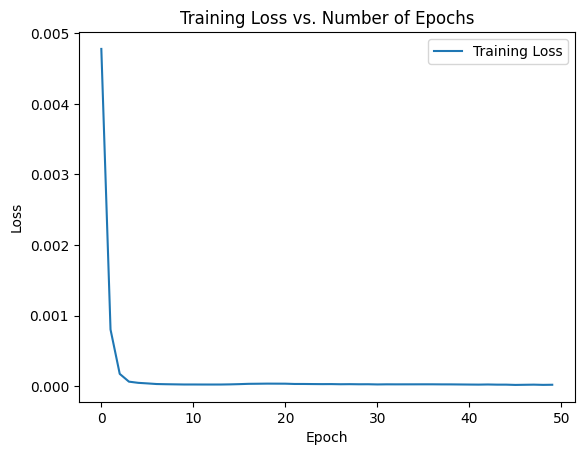

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
RMSE: 1.9135972520820654
MAPE: 0.48845020127826777


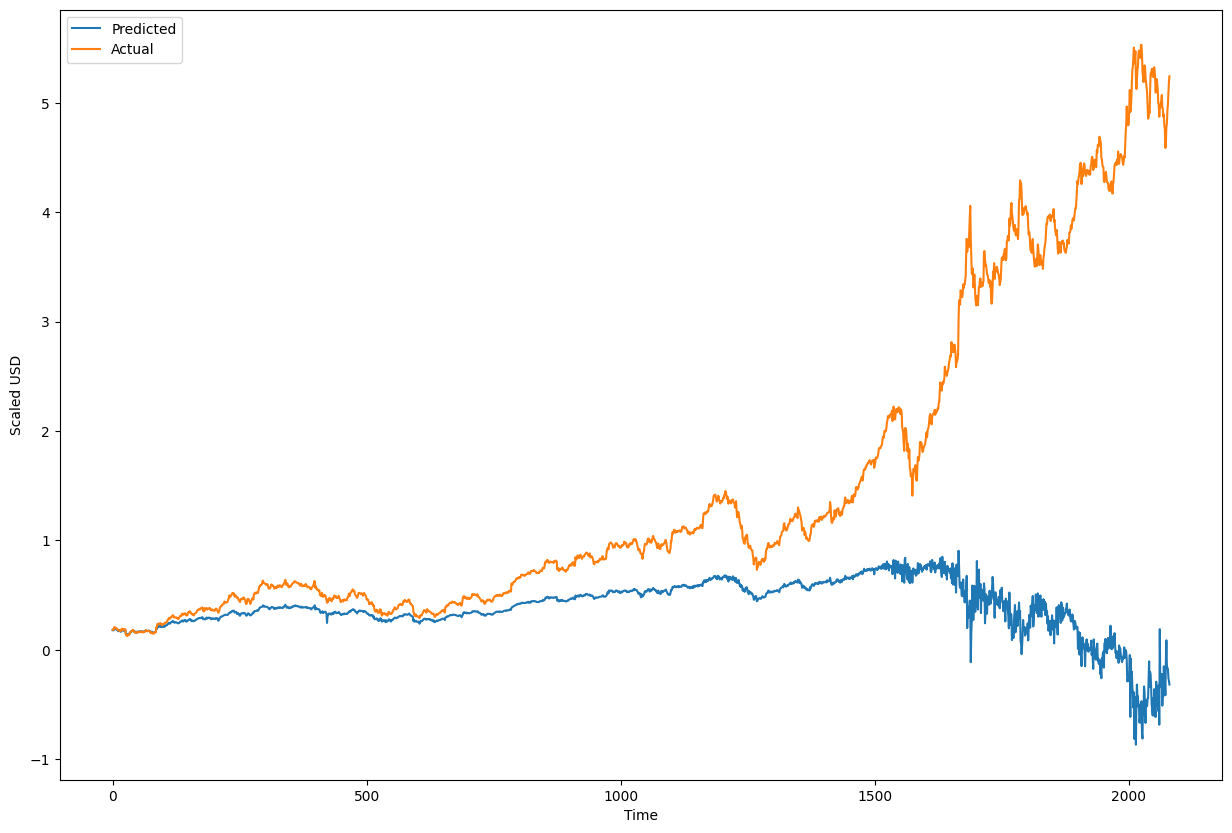

In [30]:
lstm_model2, Y_pred_lstm2, Y_test2 = predict_lstm(appl_data,lstm_units=50)
plot_predicted_vs_actual(Y_pred_lstm2, Y_test2)

Actual feature data shape  : (10400, 10, 1)
Actual target data shape   : (10400,)
Training feature data shape: (8320, 10, 1)
Training target data shape : (8320,)
Testing feature data shape : (2080, 10, 1)
Testing target data shape  : (2080,)
LSTM Model Summary: 


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2080/2080 - 11s - 5ms/step - loss: 0.0024
Epoch 2/50
2080/2080 - 9s - 4ms/step - loss: 7.8360e-04
Epoch 3/50
2080/2080 - 10s - 5ms/step - loss: 3.0958e-04
Epoch 4/50
2080/2080 - 9s - 4ms/step - loss: 1.8017e-04
Epoch 5/50
2080/2080 - 10s - 5ms/step - loss: 1.4503e-04
Epoch 6/50
2080/2080 - 9s - 5ms/step - loss: 1.3072e-04
Epoch 7/50
2080/2080 - 10s - 5ms/step - loss: 1.5026e-04
Epoch 8/50
2080/2080 - 10s - 5ms/step - loss: 1.0841e-04
Epoch 9/50
2080/2080 - 10s - 5ms/step - loss: 1.0903e-04
Epoch 10/50
2080/2080 - 9s - 4ms/step - loss: 1.0940e-04
Epoch 11/50
2080/2080 - 10s - 5ms/step - loss: 1.2249e-04
Epoch 12/50
2080/2080 - 10s - 5ms/step - loss: 1.0526e-04
Epoch 13/50
2080/2080 - 10s - 5ms/step - loss: 1.0422e-04
Epoch 14/50
2080/2080 - 9s - 4ms/step - loss: 1.1672e-04
Epoch 15/50
2080/2080 - 9s - 4ms/step - loss: 1.0758e-04
Epoch 16/50
2080/2080 - 9s - 4ms/step - loss: 9.4401e-05
Epoch 17/50
2080/2080 - 10s - 5ms/step - loss: 7.5568e-05
Epoch 18/50
2080/2080 - 10s -

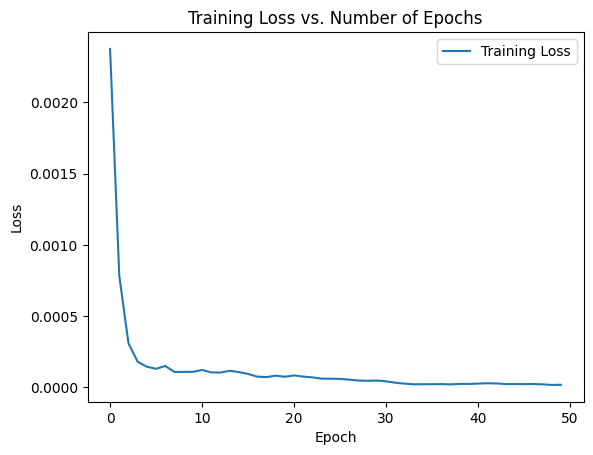

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE: 0.8336928703928125
MAPE: 0.4644122823777774


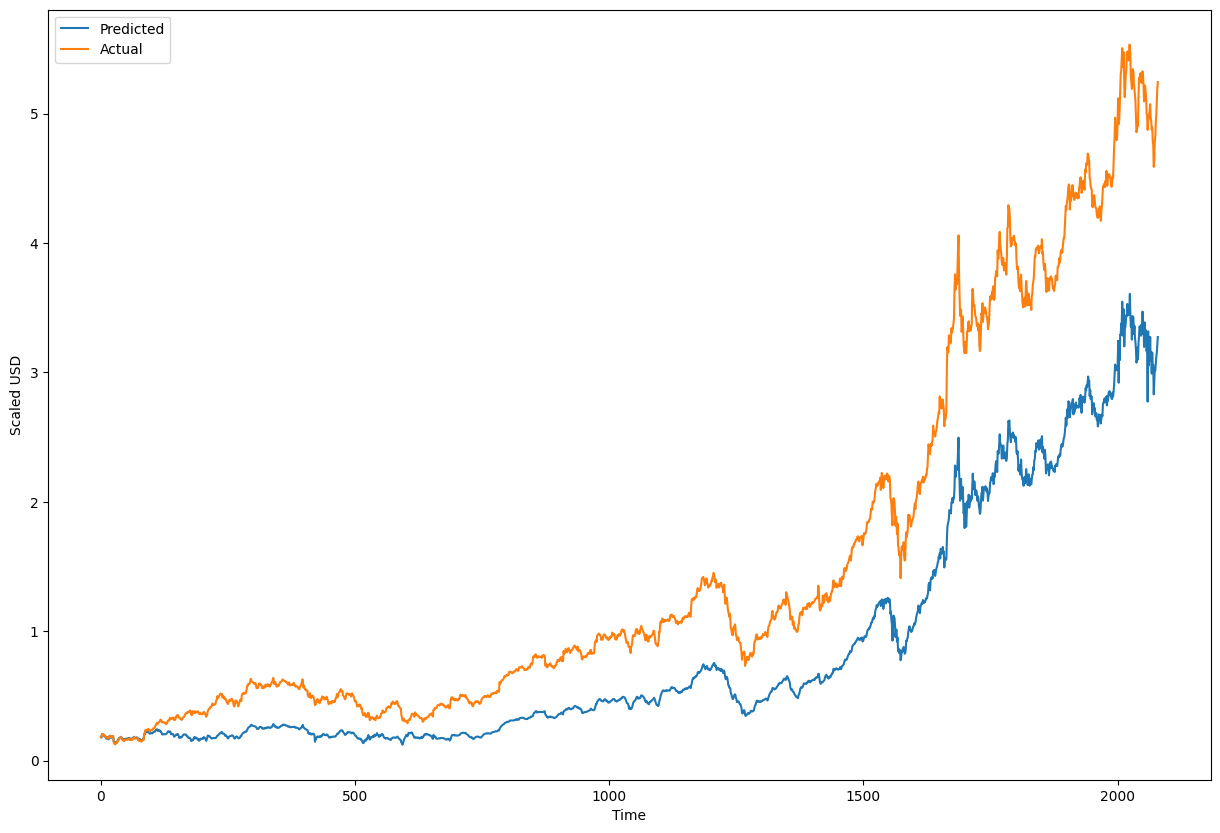

In [31]:
lstm_model3, Y_pred_lstm3, Y_test3 = predict_lstm(appl_data,n_steps=10,lstm_units=50)
plot_predicted_vs_actual(Y_pred_lstm3, Y_test3)

# Simple Moving Average

In [163]:
# Function to predict using Simple Moving Average (SMA) and evaluate the performance
def predict_sma(sma_data, train_split=0.8):
    # Calculate the split index based on the train-test split ratio
    split_index = int(np.ceil(len(sma_data) * train_split))
    
    # Split the dataset into training and testing sets based on the 'Close' column
    Train_sma = sma_data[['Close']].iloc[:split_index]  # Training data: 'Close' prices up to the split index
    Test_sma = sma_data[['Close']].iloc[split_index:]  # Test data: 'Close' prices from the split index onwards
    
    # Generate predictions using the Simple Moving Average (SMA) for the test set
    # The predicted values for the test set are set to the last value of the rolling mean of the training set
    Test_pred_sma = np.array([Train_sma.rolling(10).mean().iloc[-1]] * len(Test_sma)).reshape((-1, 1))

    # Calculate the Mean Squared Error (MSE) between the actual test values and the predicted values
    MSE = mean_squared_error(Test_sma, Test_pred_sma)
    
    # Calculate the Root Mean Squared Error (RMSE) by taking the square root of the MSE
    RMSE = np.sqrt(MSE)
    print('Test RMSE: %.3f' % RMSE)  # Output RMSE value
    
    # Calculate the Mean Absolute Percentage Error (MAPE) for the test set
    MAPE = mean_absolute_percentage_error(Test_sma, Test_pred_sma)
    print('Test MAPE: %.3f' % MAPE)  # Output MAPE value
    
    # Plot the actual and predicted values
    plt.figure(figsize=(20, 5))
    
    # Set the x-axis to display dates at a certain interval for better readability
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=25))
    
    # Plot the actual 'Close' values from the test set
    plt.plot(Test_sma, label='Actual')
    
    # Plot the predicted values
    plt.plot(Test_pred_sma, label='Predicted')
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=90)
    
    # Add a legend to differentiate between actual and predicted values
    plt.legend()
    
    # Show the plot
    plt.show()



Test RMSE: 58.522
Test MAPE: 0.506


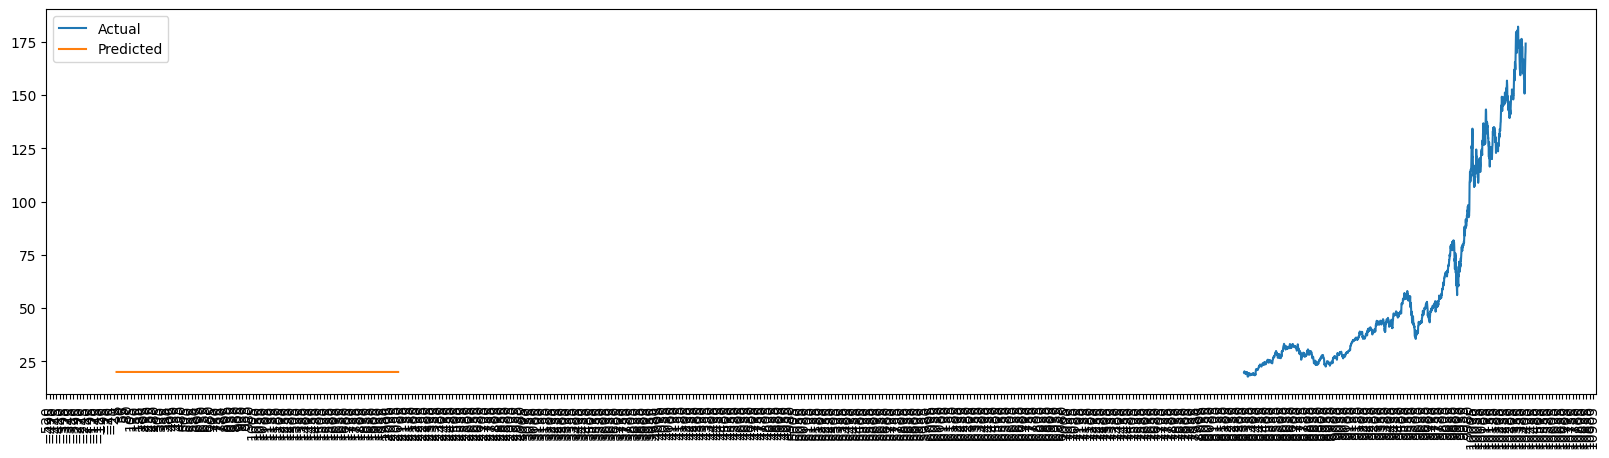

In [165]:
predict_sma(appl_data)

# Exponential Moving Average

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Function to predict using Exponential Moving Average (EMA) and evaluate performance
def predict_ema(ema_data, train_split=0.8):
    # Extract the 'Close' prices from the data as a NumPy array
    X = ema_data[['Close']].values
    
    # Calculate the index to split the data into training and testing sets
    split_index = int(np.ceil(len(X) * train_split))
    
    # Split the dataset into training and testing sets
    Train_ema = X[:split_index]  # Training data up to the split index
    Test_ema = X[split_index:]   # Test data from the split index onwards
    
    # Initialize an empty array to store the predicted values
    Test_concat = np.array([]).reshape((0, 1))

    # Loop over the test data to predict one point at a time using the EMA model
    for i in range(len(Test_ema)):
        # Concatenate the current training data with the predictions made so far
        Train_fit = np.concatenate((Train_ema, np.asarray(Test_concat)))
        
        # Fit the Simple Exponential Smoothing model on the training data
        fit_ema = SimpleExpSmoothing(np.asarray(Train_fit)).fit(smoothing_level=0.2)
        
        # Forecast the next value based on the fitted model
        Test_pred_ema = fit_ema.forecast(1)
        
        # Append the predicted value to the test_concat array
        Test_concat = np.concatenate((np.asarray(Test_concat), Test_pred_ema.reshape((-1, 1))))

    # Calculate the performance metrics: RMSE (Root Mean Squared Error)
    MSE = mean_squared_error(Test_ema,Test_concat) 
    RMSE = np.sqrt(MSE)
    print('Test RMSE: %.3f' % RMSE)  # Output RMSE value

    # Calculate MAPE (Mean Absolute Percentage Error) for the test set
    MAPE = mean_absolute_percentage_error(Test_ema, Test_concat)
    print('Test MAPE: %.3f' % MAPE)  # Output MAPE value
    
    # Plot the actual test values and the predicted values
    plt.figure(figsize=(20, 5))
    
    # Set the x-axis to display dates at a certain interval for better readability
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
    
    # Plot the actual 'Close' values from the test set
    plt.plot(Test_ema, label='Actual')
    
    # Plot the predicted values using EMA
    plt.plot(Test_concat, label='Predicted')
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=90)
    
    # Add a legend to differentiate between actual and predicted values
    plt.legend()
    
    # Show the plot
    plt.show()


Test RMSE: 58.619
Test MAPE: 0.509


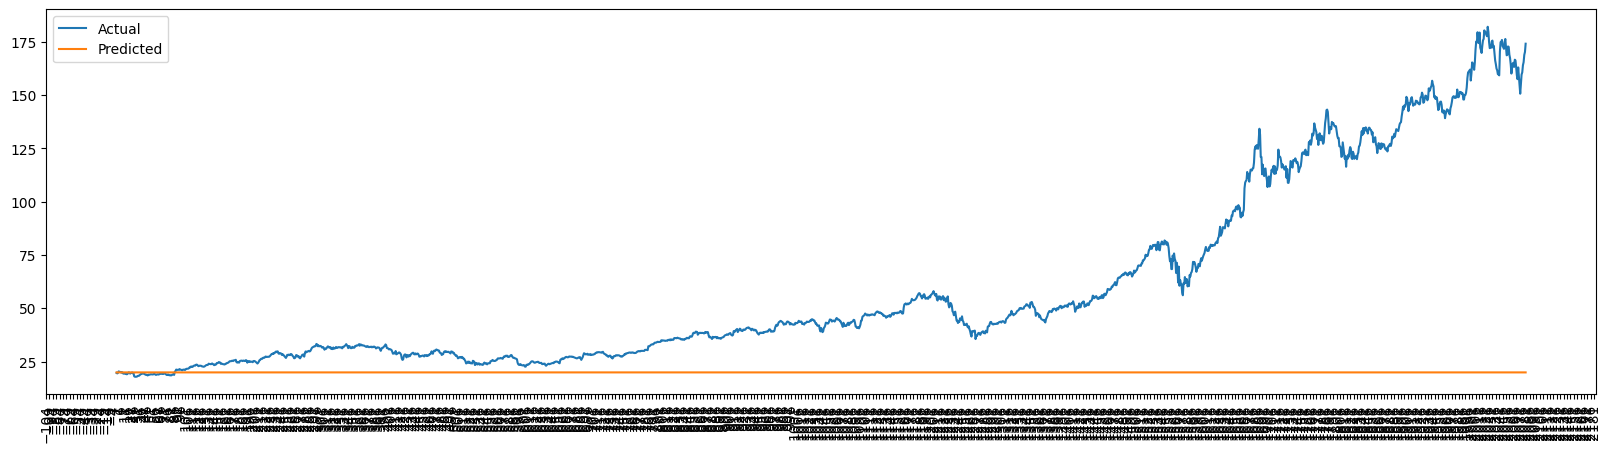

In [167]:
predict_ema(appl_data)

# First 25 years data (1980 - 2004)

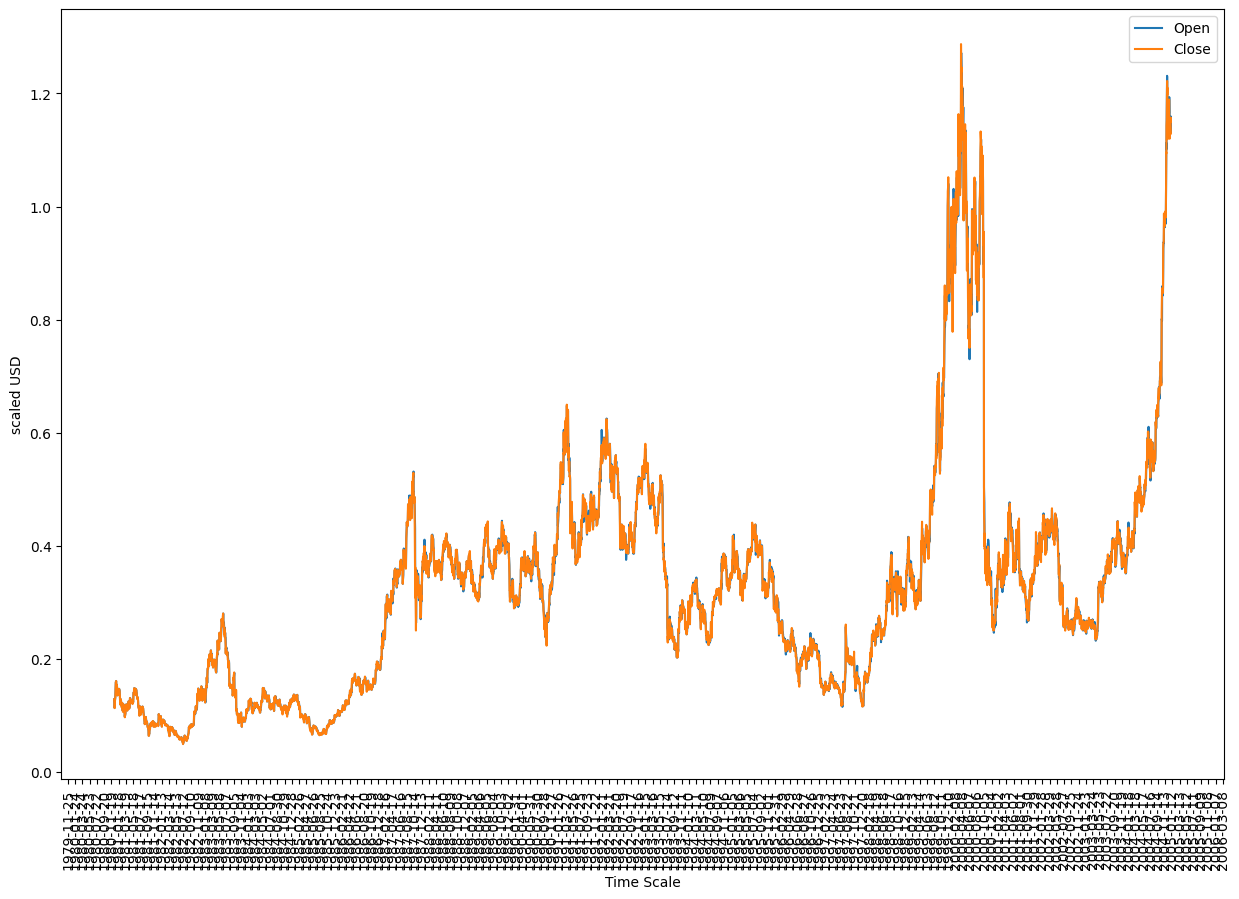

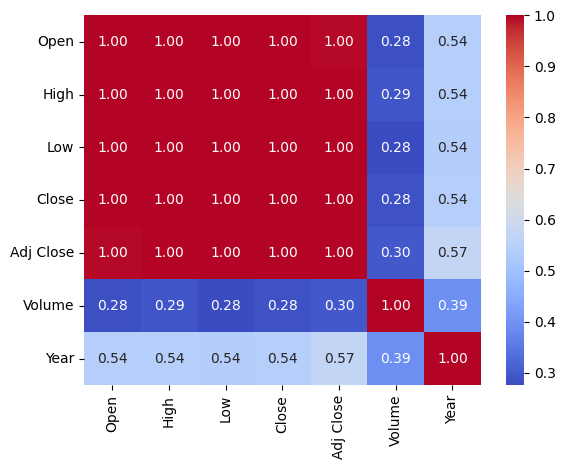

In [39]:
# Visualisation
plot_graph(appl_data_first_25, features = ['Open', 'Close'])
correlation_matrix1 = appl_data_first_25.corr()
sns.heatmap(correlation_matrix1, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

**LSTM**

Actual feature data shape  : (10408, 2, 1)
Actual target data shape   : (10408,)
Training feature data shape: (8327, 2, 1)
Training target data shape : (8327,)
Testing feature data shape : (2081, 2, 1)
Testing target data shape  : (2081,)
LSTM Model Summary: 


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2082/2082 - 9s - 5ms/step - loss: 0.0033
Epoch 2/50
2082/2082 - 6s - 3ms/step - loss: 6.7116e-04
Epoch 3/50
2082/2082 - 10s - 5ms/step - loss: 1.5421e-04
Epoch 4/50
2082/2082 - 11s - 5ms/step - loss: 6.4125e-05
Epoch 5/50
2082/2082 - 10s - 5ms/step - loss: 3.4432e-05
Epoch 6/50
2082/2082 - 7s - 3ms/step - loss: 2.9342e-05
Epoch 7/50
2082/2082 - 7s - 3ms/step - loss: 2.8415e-05
Epoch 8/50
2082/2082 - 10s - 5ms/step - loss: 3.1681e-05
Epoch 9/50
2082/2082 - 10s - 5ms/step - loss: 3.7533e-05
Epoch 10/50
2082/2082 - 11s - 5ms/step - loss: 4.2038e-05
Epoch 11/50
2082/2082 - 6s - 3ms/step - loss: 4.4224e-05
Epoch 12/50
2082/2082 - 7s - 3ms/step - loss: 4.1095e-05
Epoch 13/50
2082/2082 - 10s - 5ms/step - loss: 4.2205e-05
Epoch 14/50
2082/2082 - 11s - 5ms/step - loss: 3.8043e-05
Epoch 15/50
2082/2082 - 6s - 3ms/step - loss: 3.7152e-05
Epoch 16/50
2082/2082 - 11s - 5ms/step - loss: 3.7444e-05
Epoch 17/50
2082/2082 - 6s - 3ms/step - loss: 3.9903e-05
Epoch 18/50
2082/2082 - 7s - 3

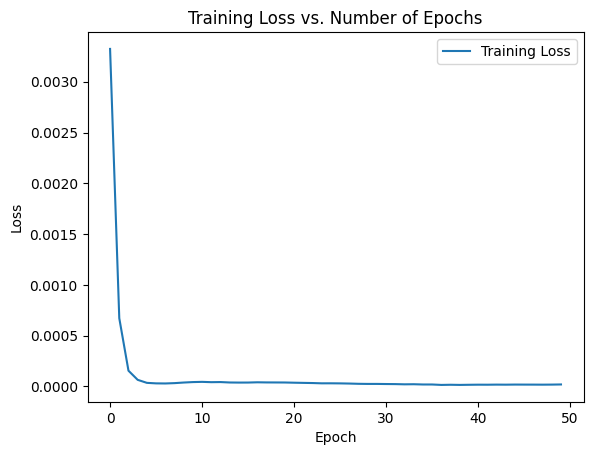

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
RMSE: 3.008936945914922
MAPE: 0.6107529949395072


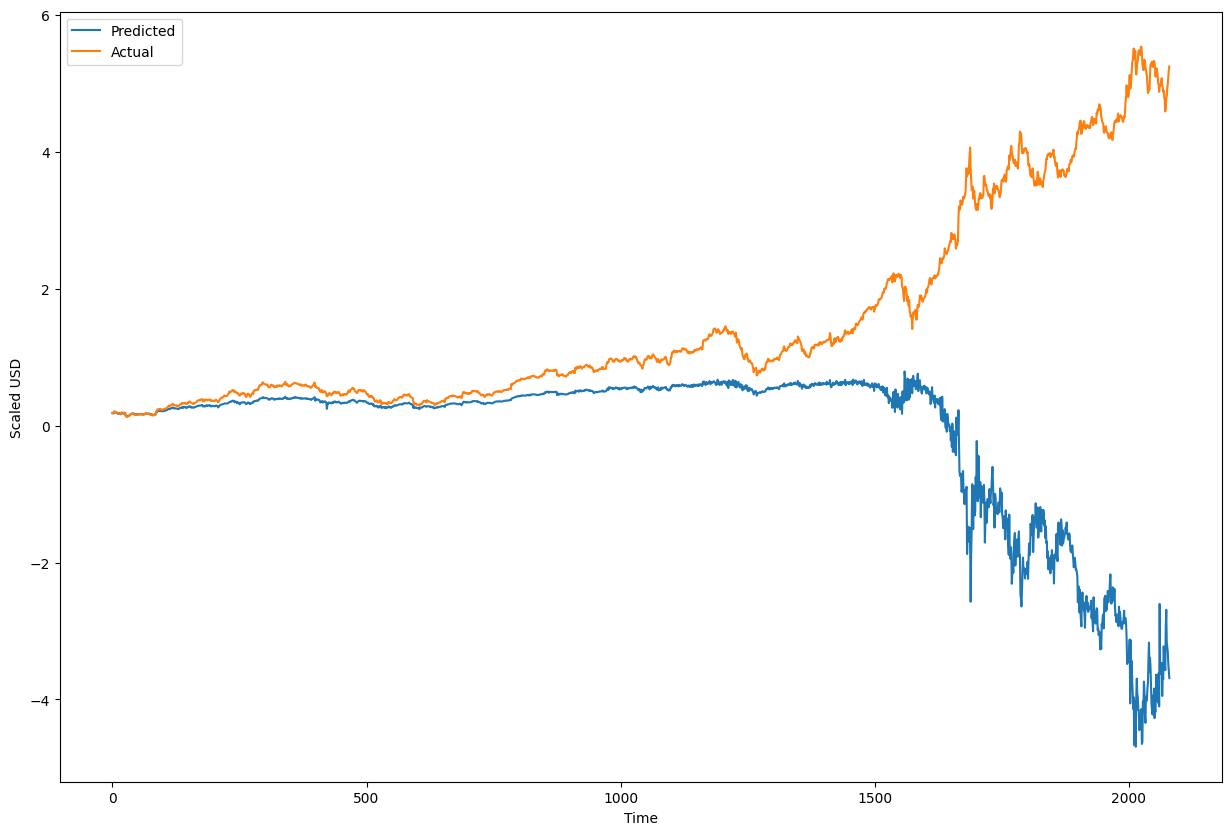

In [41]:
first25_lstm, first25_Y_pred, first25_Y_test = predict_lstm(appl_data_first_25)
plot_predicted_vs_actual (first25_Y_pred,first25_Y_test)

Actual feature data shape  : (10400, 10, 1)
Actual target data shape   : (10400,)
Training feature data shape: (8320, 10, 1)
Training target data shape : (8320,)
Testing feature data shape : (2080, 10, 1)
Testing target data shape  : (2080,)
LSTM Model Summary: 


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2080/2080 - 11s - 5ms/step - loss: 0.0035
Epoch 2/50
2080/2080 - 10s - 5ms/step - loss: 6.3206e-04
Epoch 3/50
2080/2080 - 11s - 5ms/step - loss: 2.1054e-04
Epoch 4/50
2080/2080 - 10s - 5ms/step - loss: 1.0701e-04
Epoch 5/50
2080/2080 - 9s - 4ms/step - loss: 1.0911e-04
Epoch 6/50
2080/2080 - 9s - 4ms/step - loss: 1.1698e-04
Epoch 7/50
2080/2080 - 10s - 5ms/step - loss: 9.1958e-05
Epoch 8/50
2080/2080 - 9s - 4ms/step - loss: 9.0410e-05
Epoch 9/50
2080/2080 - 10s - 5ms/step - loss: 7.7568e-05
Epoch 10/50
2080/2080 - 9s - 4ms/step - loss: 7.1078e-05
Epoch 11/50
2080/2080 - 9s - 4ms/step - loss: 6.9870e-05
Epoch 12/50
2080/2080 - 9s - 4ms/step - loss: 6.9259e-05
Epoch 13/50
2080/2080 - 9s - 4ms/step - loss: 6.6319e-05
Epoch 14/50
2080/2080 - 9s - 4ms/step - loss: 6.0422e-05
Epoch 15/50
2080/2080 - 10s - 5ms/step - loss: 5.6106e-05
Epoch 16/50
2080/2080 - 10s - 5ms/step - loss: 4.8805e-05
Epoch 17/50
2080/2080 - 9s - 5ms/step - loss: 4.2475e-05
Epoch 18/50
2080/2080 - 9s - 4m

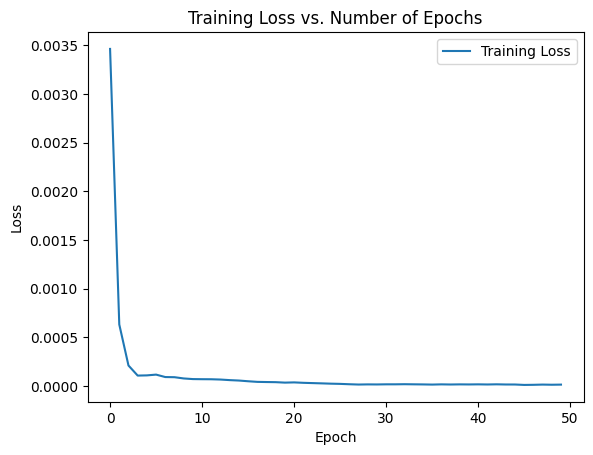

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
RMSE: 1.3146340911910501
MAPE: 0.3731805287675057


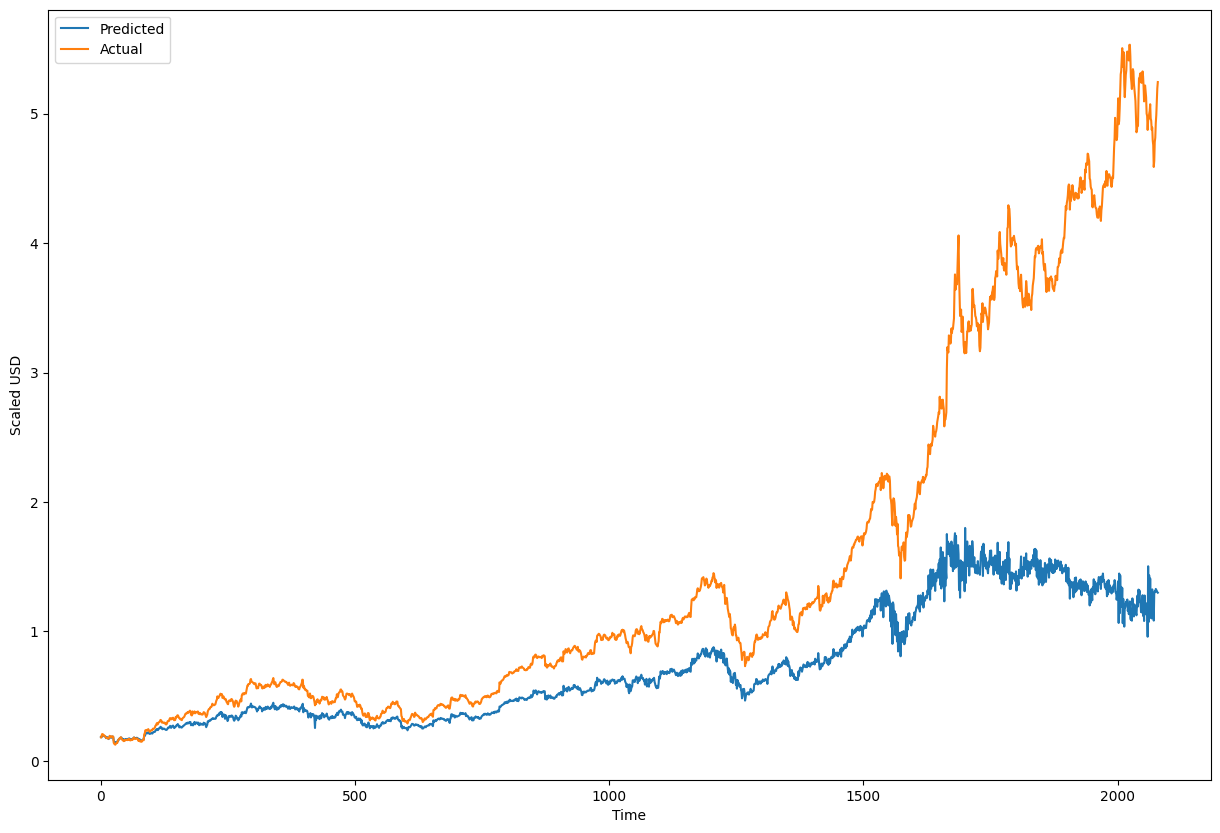

In [42]:
first25_lstm1, first25_Y_pred1, first25_Y_test1 = predict_lstm(appl_data_first_25, n_steps = 10)
plot_predicted_vs_actual (first25_Y_pred1,first25_Y_test1)

**SMA**

Test RMSE: 0.611
Test MAPE: 1.617


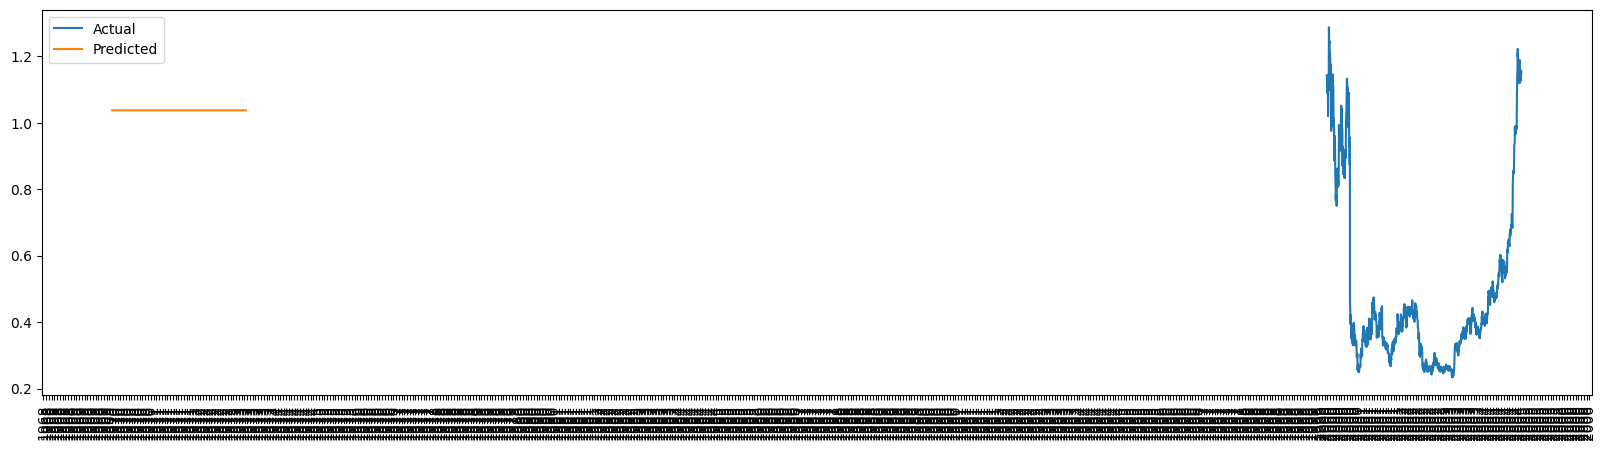

In [169]:
predict_sma(appl_data_first_25)

**EMA**

Test RMSE: 0.625
Test MAPE: 1.654


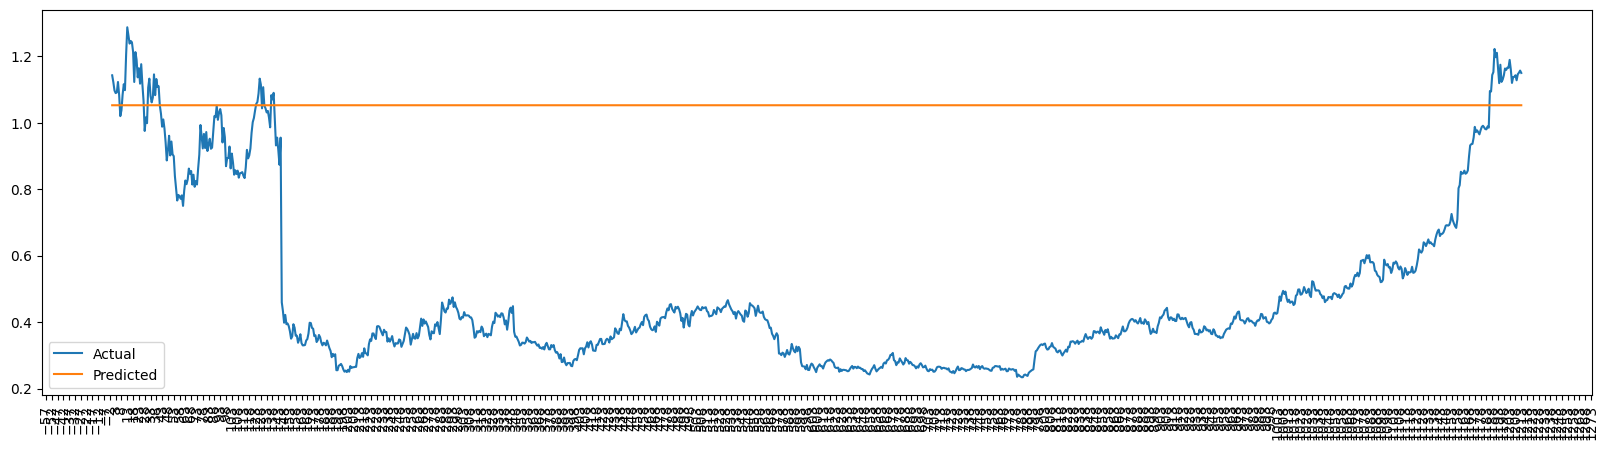

In [96]:
predict_ema(appl_data_first_25)

# Next 10 years data (2005 - 2014)

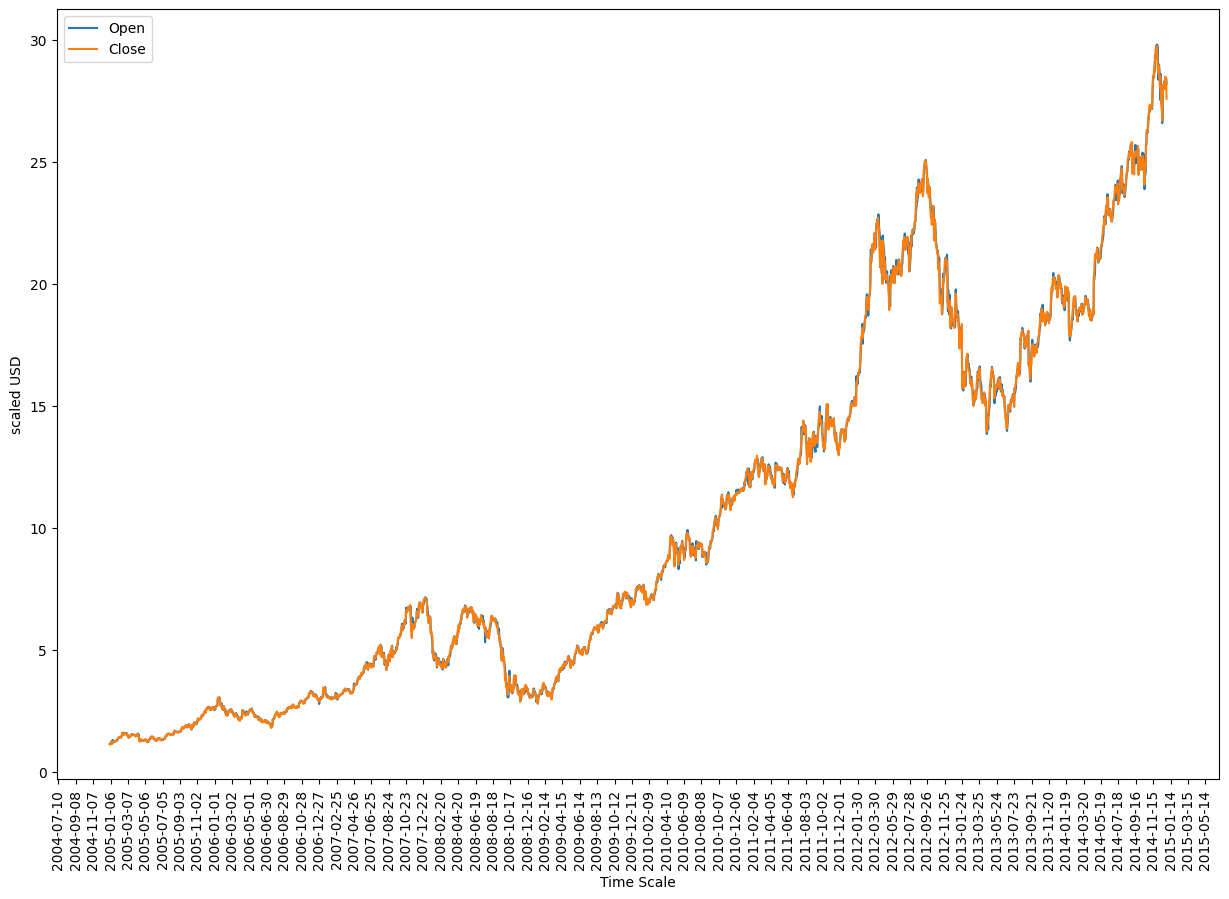

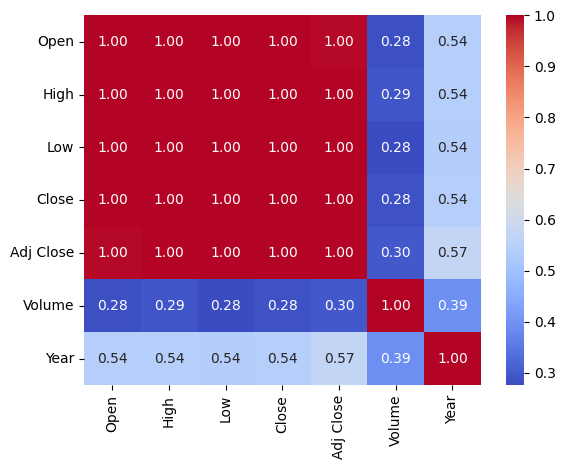

In [48]:
# Visualisation
plot_graph(appl_data_next_10, features = ['Open', 'Close'])
correlation_matrix2 = appl_data_first_25.corr()
sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

**LSTM**

Actual feature data shape  : (10408, 2, 1)
Actual target data shape   : (10408,)
Training feature data shape: (8327, 2, 1)
Training target data shape : (8327,)
Testing feature data shape : (2081, 2, 1)
Testing target data shape  : (2081,)
LSTM Model Summary: 


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2082/2082 - 9s - 4ms/step - loss: 0.0050
Epoch 2/50
2082/2082 - 6s - 3ms/step - loss: 7.6393e-04
Epoch 3/50
2082/2082 - 6s - 3ms/step - loss: 1.8262e-04
Epoch 4/50
2082/2082 - 10s - 5ms/step - loss: 6.3695e-05
Epoch 5/50
2082/2082 - 6s - 3ms/step - loss: 2.9528e-05
Epoch 6/50
2082/2082 - 11s - 5ms/step - loss: 2.4094e-05
Epoch 7/50
2082/2082 - 10s - 5ms/step - loss: 2.5721e-05
Epoch 8/50
2082/2082 - 6s - 3ms/step - loss: 2.9901e-05
Epoch 9/50
2082/2082 - 6s - 3ms/step - loss: 3.4963e-05
Epoch 10/50
2082/2082 - 6s - 3ms/step - loss: 3.9011e-05
Epoch 11/50
2082/2082 - 6s - 3ms/step - loss: 3.9025e-05
Epoch 12/50
2082/2082 - 6s - 3ms/step - loss: 3.6737e-05
Epoch 13/50
2082/2082 - 6s - 3ms/step - loss: 3.6655e-05
Epoch 14/50
2082/2082 - 6s - 3ms/step - loss: 3.6645e-05
Epoch 15/50
2082/2082 - 11s - 5ms/step - loss: 3.5619e-05
Epoch 16/50
2082/2082 - 7s - 3ms/step - loss: 3.5538e-05
Epoch 17/50
2082/2082 - 6s - 3ms/step - loss: 3.5645e-05
Epoch 18/50
2082/2082 - 3s - 1ms/st

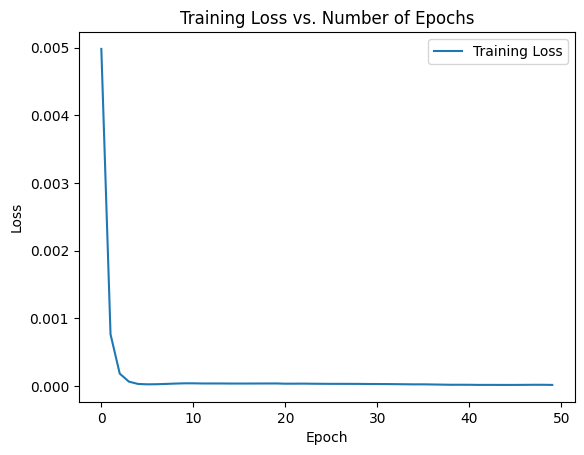

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE: 2.6489270342157236
MAPE: 0.5600446421570683


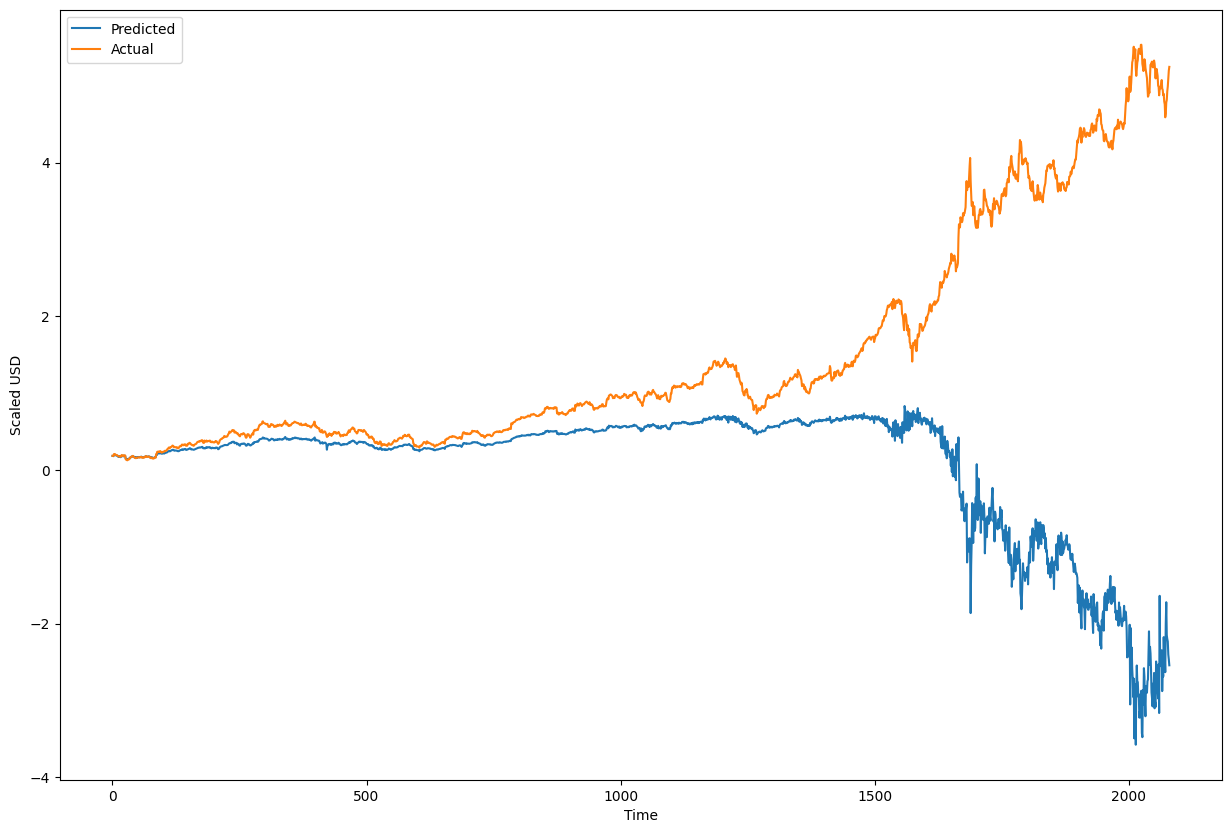

In [98]:
Next10_lstm, Next10_Y_pred, Next10_Y_test = predict_lstm(appl_data_next_10)
plot_predicted_vs_actual (Next10_Y_pred,Next10_Y_test)

Actual feature data shape  : (10400, 10, 1)
Actual target data shape   : (10400,)
Training feature data shape: (8320, 10, 1)
Training target data shape : (8320,)
Testing feature data shape : (2080, 10, 1)
Testing target data shape  : (2080,)
LSTM Model Summary: 


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2080/2080 - 6s - 3ms/step - loss: 0.0012
Epoch 2/50
2080/2080 - 5s - 2ms/step - loss: 3.1843e-04
Epoch 3/50
2080/2080 - 5s - 2ms/step - loss: 1.7831e-04
Epoch 4/50
2080/2080 - 5s - 2ms/step - loss: 9.6529e-05
Epoch 5/50
2080/2080 - 5s - 3ms/step - loss: 8.1896e-05
Epoch 6/50
2080/2080 - 6s - 3ms/step - loss: 6.3953e-05
Epoch 7/50
2080/2080 - 10s - 5ms/step - loss: 5.8405e-05
Epoch 8/50
2080/2080 - 5s - 3ms/step - loss: 5.4848e-05
Epoch 9/50
2080/2080 - 5s - 3ms/step - loss: 5.4362e-05
Epoch 10/50
2080/2080 - 6s - 3ms/step - loss: 5.6818e-05
Epoch 11/50
2080/2080 - 6s - 3ms/step - loss: 4.8629e-05
Epoch 12/50
2080/2080 - 5s - 2ms/step - loss: 4.9018e-05
Epoch 13/50
2080/2080 - 5s - 2ms/step - loss: 4.0333e-05
Epoch 14/50
2080/2080 - 5s - 3ms/step - loss: 3.9583e-05
Epoch 15/50
2080/2080 - 5s - 3ms/step - loss: 3.9926e-05
Epoch 16/50
2080/2080 - 5s - 2ms/step - loss: 3.6116e-05
Epoch 17/50
2080/2080 - 5s - 2ms/step - loss: 3.6819e-05
Epoch 18/50
2080/2080 - 5s - 2ms/step 

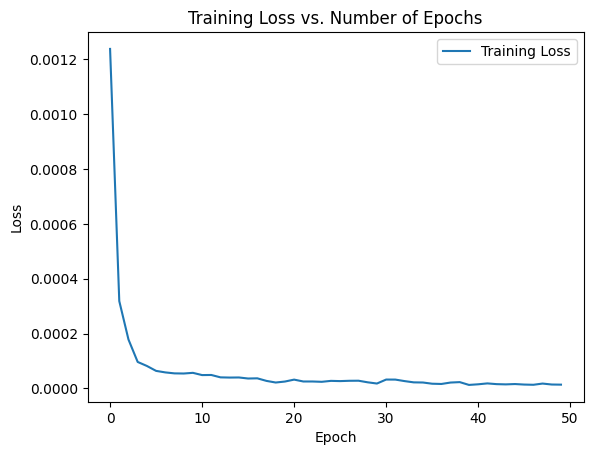

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE: 1.0352683981598556
MAPE: 0.3503292673003377


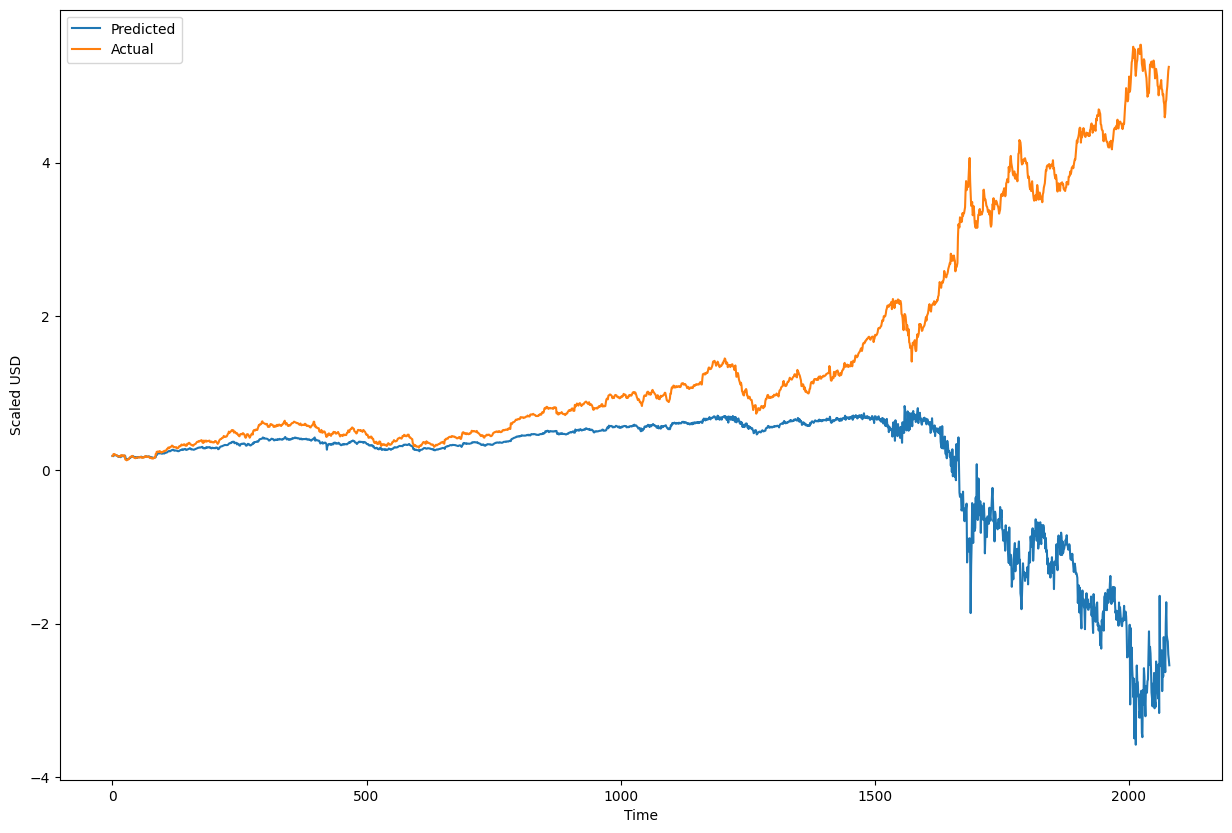

In [99]:
Next10_lstm1, Next10_Y_pred1, Next10_Y_test = predict_lstm(appl_data_next_10,n_steps = 10)
plot_predicted_vs_actual (Next10_Y_pred,Next10_Y_test)

**SMA**

Test RMSE: 4.246
Test MAPE: 0.153


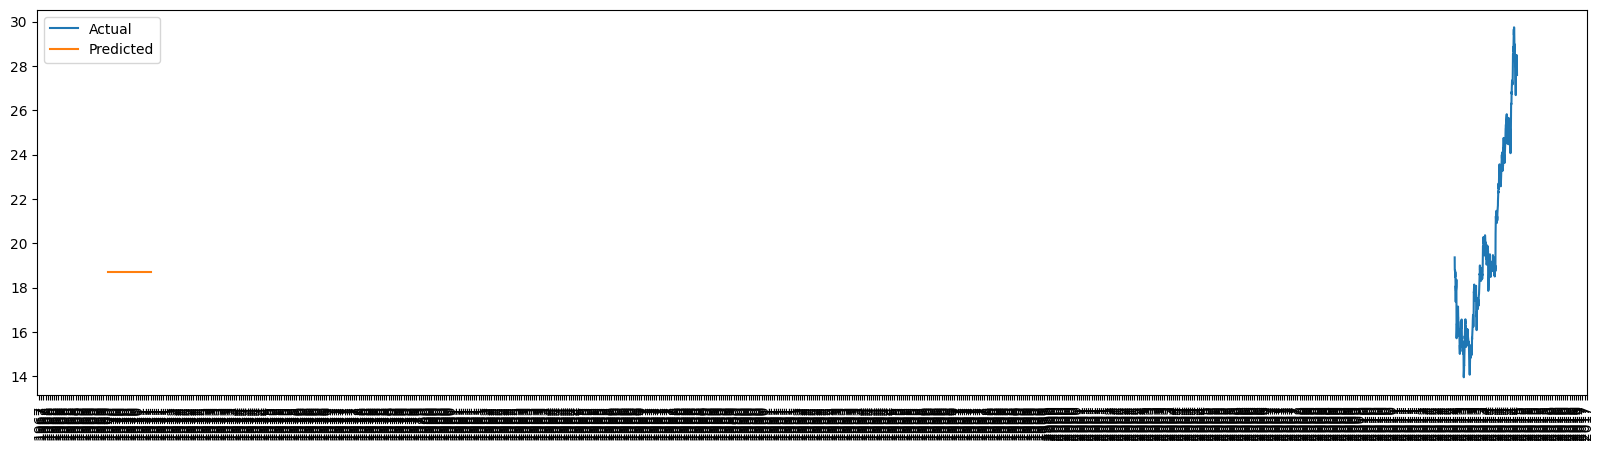

In [171]:
predict_sma(appl_data_next_10)

**EMA**

Test RMSE: 4.211
Test MAPE: 0.154


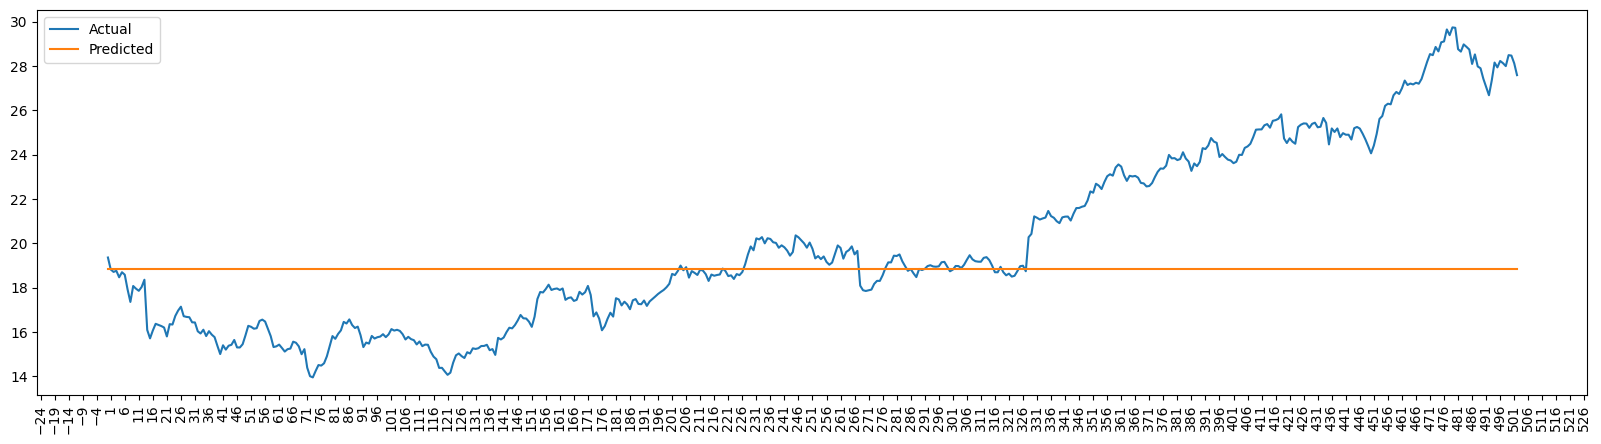

In [118]:
predict_ema(appl_data_next_10)

# Remaining years data (2015 - 2022)

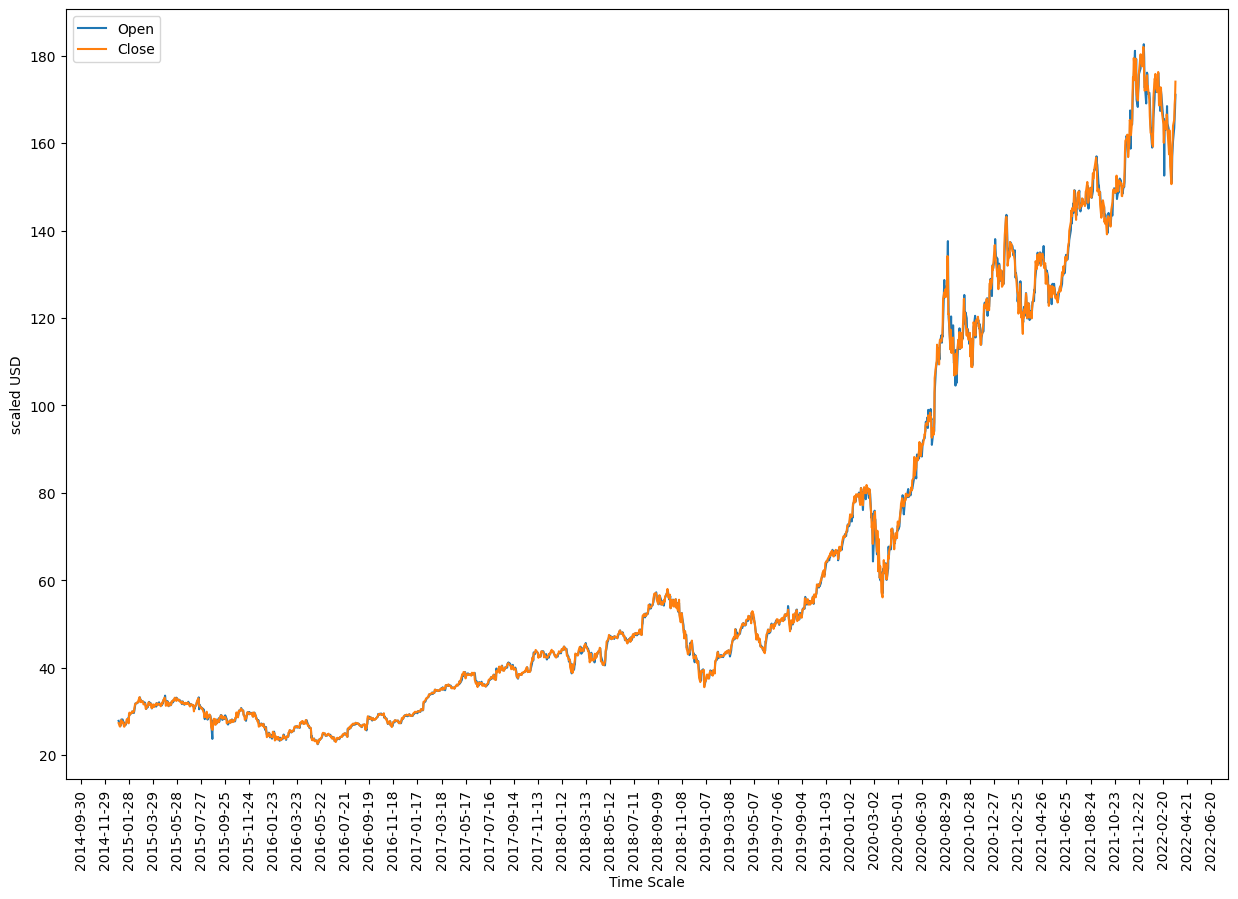

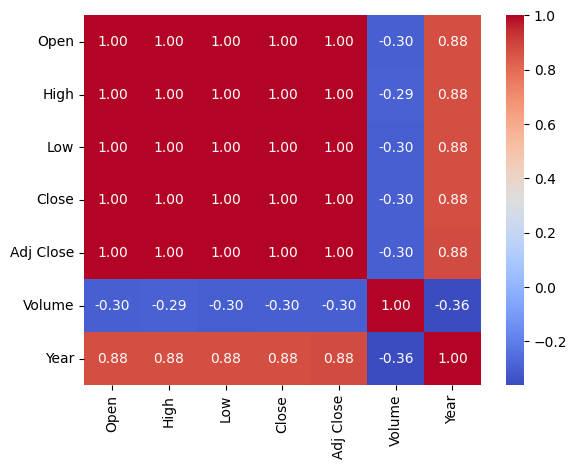

In [120]:
# Visualisation
plot_graph(appl_data_remaining, features = ['Open', 'Close'])
correlation_matrix3 = appl_data_remaining.corr()
sns.heatmap(correlation_matrix3, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

**LSTM**

Actual feature data shape  : (10408, 2, 1)
Actual target data shape   : (10408,)
Training feature data shape: (8327, 2, 1)
Training target data shape : (8327,)
Testing feature data shape : (2081, 2, 1)
Testing target data shape  : (2081,)
LSTM Model Summary: 


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2082/2082 - 4s - 2ms/step - loss: 0.0055
Epoch 2/50
2082/2082 - 3s - 1ms/step - loss: 8.8734e-04
Epoch 3/50
2082/2082 - 3s - 1ms/step - loss: 1.7793e-04
Epoch 4/50
2082/2082 - 3s - 1ms/step - loss: 5.1944e-05
Epoch 5/50
2082/2082 - 3s - 1ms/step - loss: 2.1344e-05
Epoch 6/50
2082/2082 - 3s - 1ms/step - loss: 2.3240e-05
Epoch 7/50
2082/2082 - 3s - 1ms/step - loss: 2.2019e-05
Epoch 8/50
2082/2082 - 3s - 1ms/step - loss: 2.0916e-05
Epoch 9/50
2082/2082 - 3s - 1ms/step - loss: 1.9683e-05
Epoch 10/50
2082/2082 - 3s - 1ms/step - loss: 1.9725e-05
Epoch 11/50
2082/2082 - 3s - 1ms/step - loss: 2.1096e-05
Epoch 12/50
2082/2082 - 3s - 1ms/step - loss: 2.4549e-05
Epoch 13/50
2082/2082 - 3s - 1ms/step - loss: 2.9668e-05
Epoch 14/50
2082/2082 - 5s - 2ms/step - loss: 3.2059e-05
Epoch 15/50
2082/2082 - 3s - 1ms/step - loss: 3.4772e-05
Epoch 16/50
2082/2082 - 3s - 1ms/step - loss: 3.3170e-05
Epoch 17/50
2082/2082 - 3s - 1ms/step - loss: 3.2137e-05
Epoch 18/50
2082/2082 - 3s - 1ms/step -

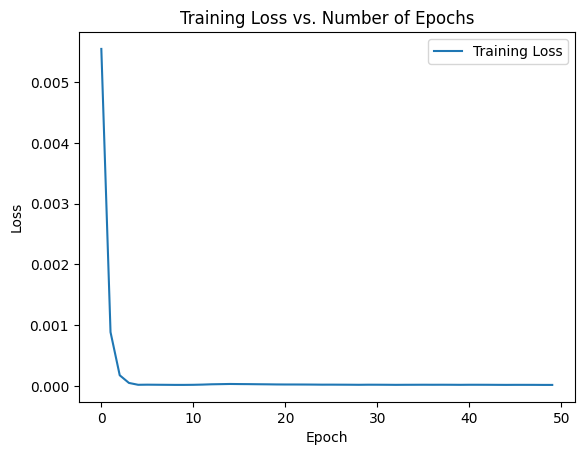

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
RMSE: 2.414298427913393
MAPE: 0.5470886101775662


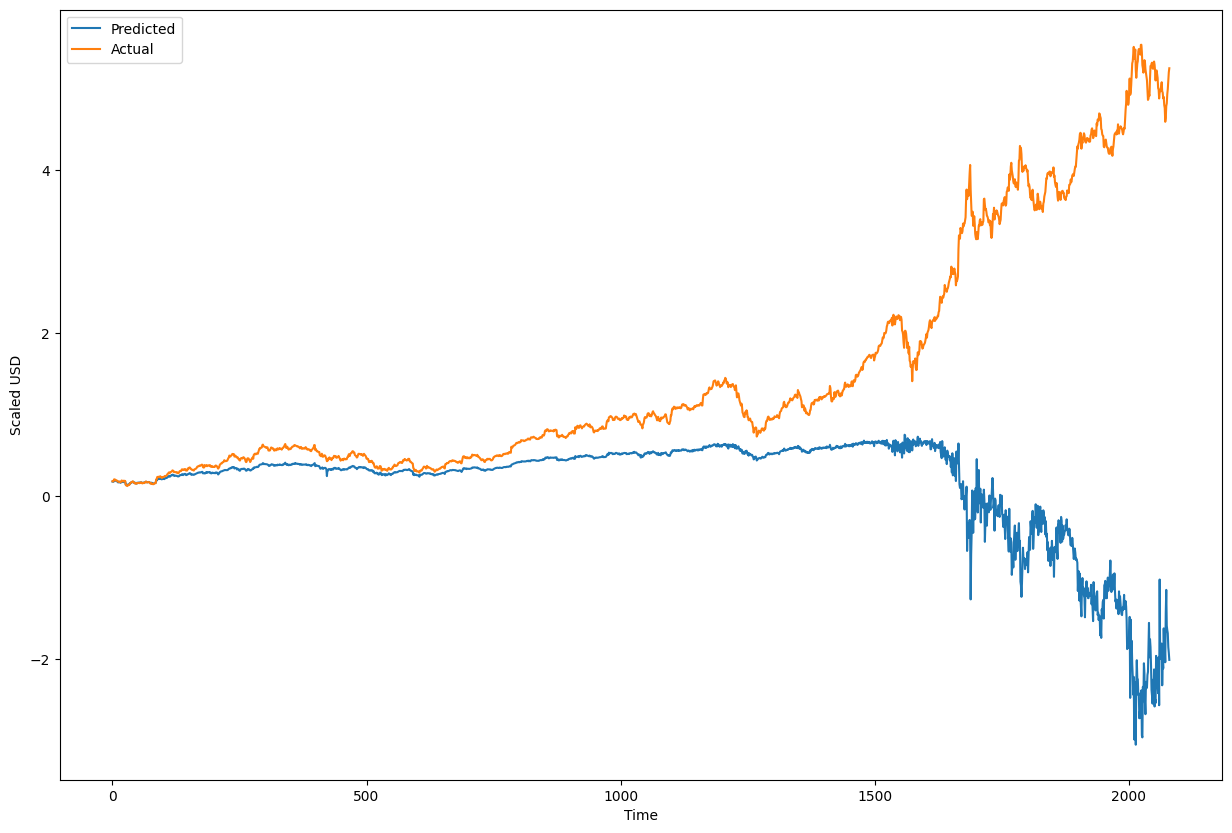

In [122]:
rem_lstm, rem_Y_pred, rem_Y_test = predict_lstm(appl_data_remaining)
plot_predicted_vs_actual(rem_Y_pred,rem_Y_test)

Actual feature data shape  : (10400, 10, 1)
Actual target data shape   : (10400,)
Training feature data shape: (8320, 10, 1)
Training target data shape : (8320,)
Testing feature data shape : (2080, 10, 1)
Testing target data shape  : (2080,)
LSTM Model Summary: 


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2080/2080 - 8s - 4ms/step - loss: 0.0014
Epoch 2/50
2080/2080 - 6s - 3ms/step - loss: 5.1251e-04
Epoch 3/50
2080/2080 - 5s - 3ms/step - loss: 2.2595e-04
Epoch 4/50
2080/2080 - 6s - 3ms/step - loss: 1.3111e-04
Epoch 5/50
2080/2080 - 5s - 2ms/step - loss: 1.1204e-04
Epoch 6/50
2080/2080 - 5s - 2ms/step - loss: 1.1172e-04
Epoch 7/50
2080/2080 - 5s - 3ms/step - loss: 1.1043e-04
Epoch 8/50
2080/2080 - 5s - 2ms/step - loss: 9.5683e-05
Epoch 9/50
2080/2080 - 6s - 3ms/step - loss: 8.1091e-05
Epoch 10/50
2080/2080 - 5s - 3ms/step - loss: 8.5181e-05
Epoch 11/50
2080/2080 - 10s - 5ms/step - loss: 8.1083e-05
Epoch 12/50
2080/2080 - 5s - 3ms/step - loss: 7.1942e-05
Epoch 13/50
2080/2080 - 5s - 2ms/step - loss: 6.4519e-05
Epoch 14/50
2080/2080 - 6s - 3ms/step - loss: 6.6421e-05
Epoch 15/50
2080/2080 - 6s - 3ms/step - loss: 5.0900e-05
Epoch 16/50
2080/2080 - 5s - 3ms/step - loss: 5.0134e-05
Epoch 17/50
2080/2080 - 5s - 3ms/step - loss: 4.2642e-05
Epoch 18/50
2080/2080 - 6s - 3ms/step 

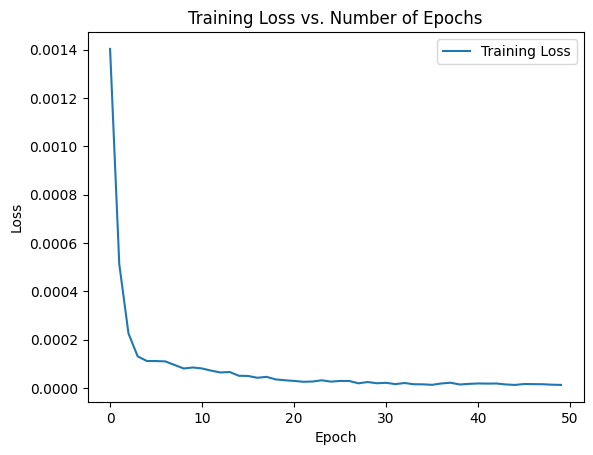

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE: 0.6957522372554191
MAPE: 0.31949793603447185


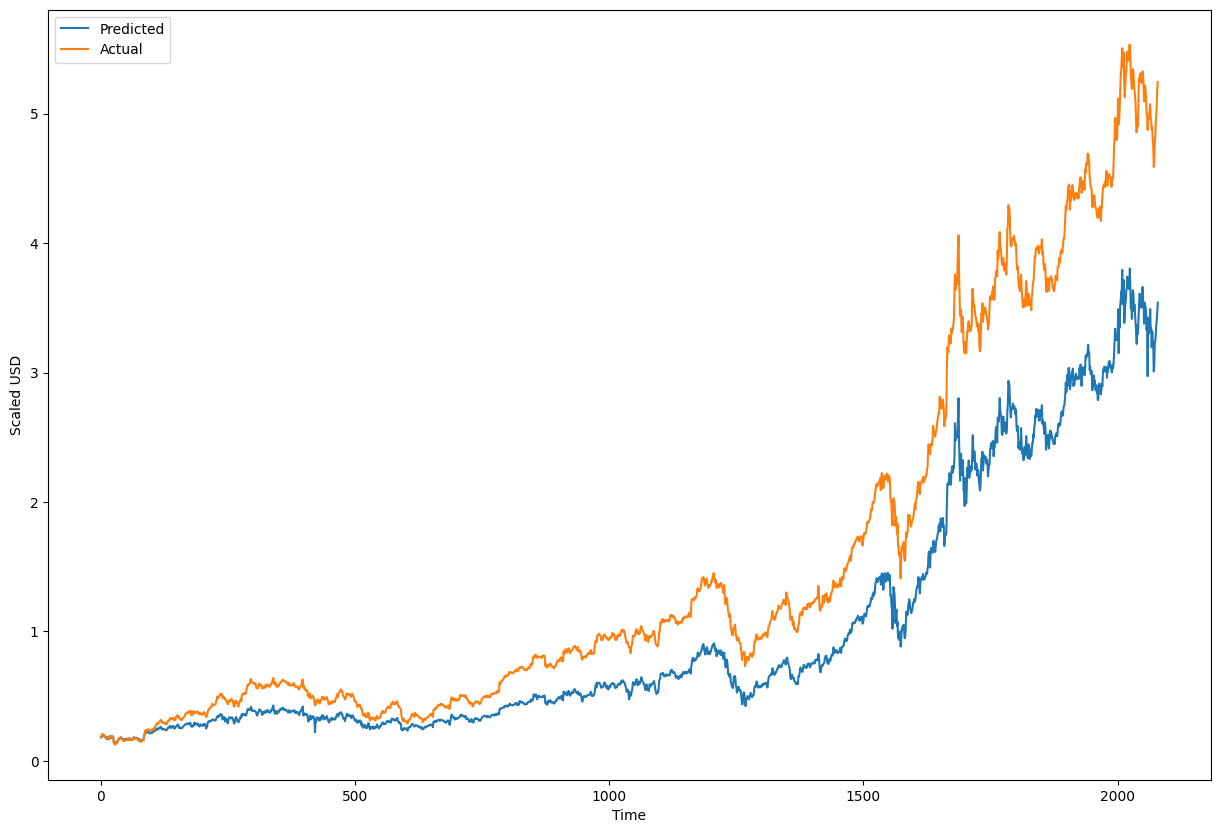

In [123]:
rem_lstm1, rem_Y_pred1, rem_Y_test1 = predict_lstm(appl_data_remaining,n_steps = 10)
plot_predicted_vs_actual(rem_Y_pred1,rem_Y_test1)

**SMA**

Test RMSE: 31.175
Test MAPE: 0.167


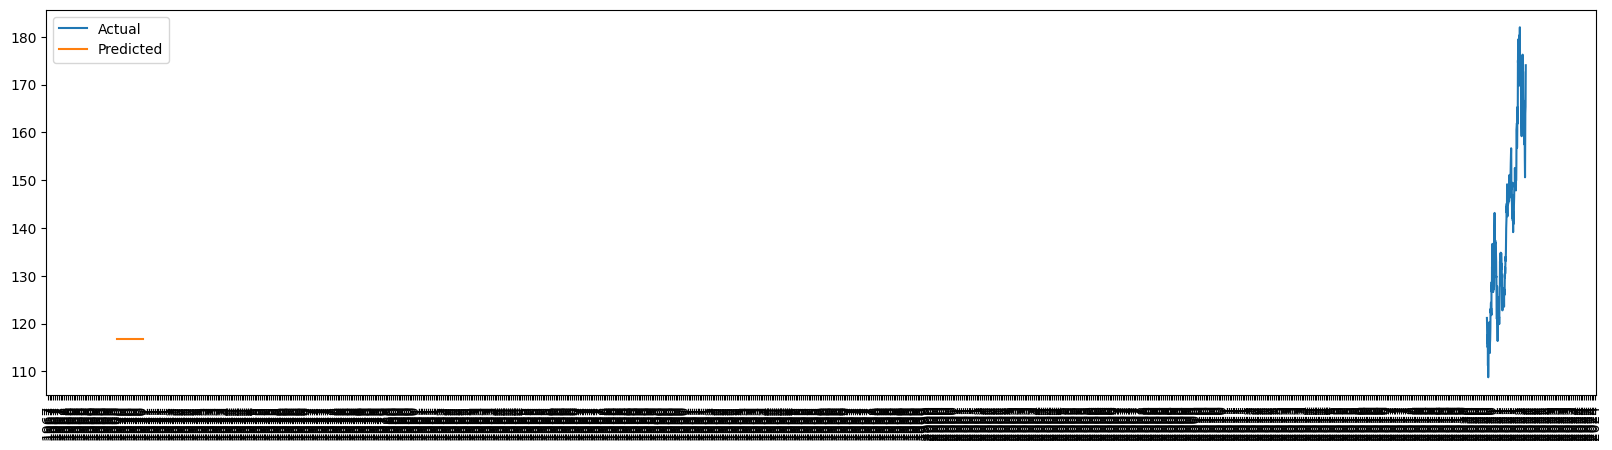

In [173]:
predict_sma(appl_data_remaining)

**EMA**

Test RMSE: 30.474
Test MAPE: 0.162


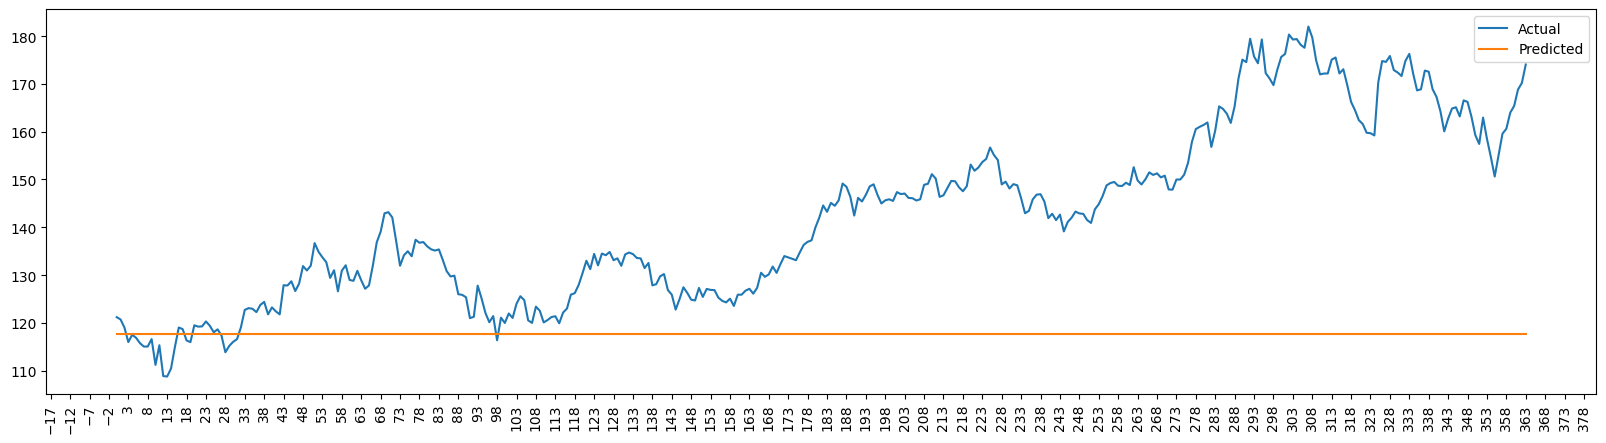

In [125]:
predict_ema(appl_data_remaining)

# Affect of COVID-19

**Before COVID-19 years data(1980-2019)**

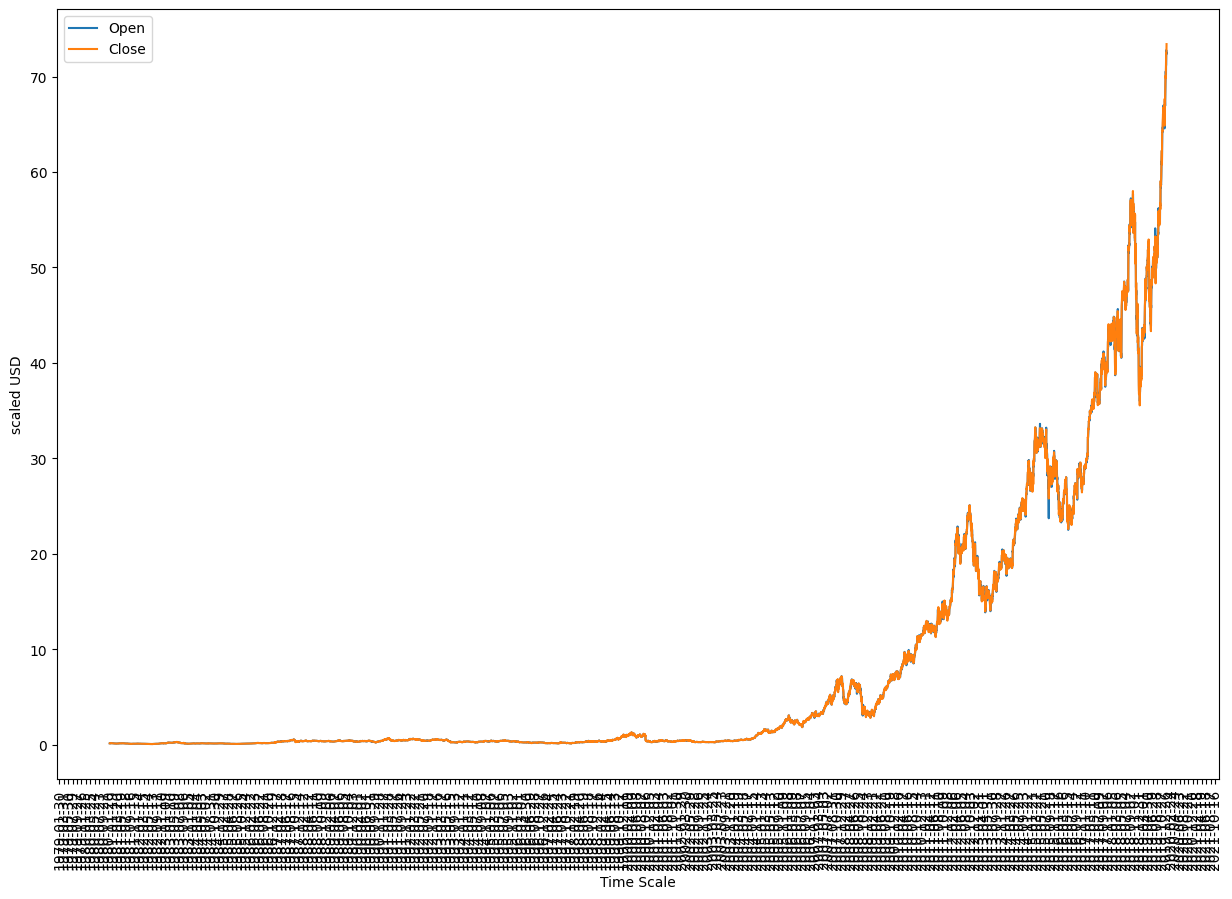

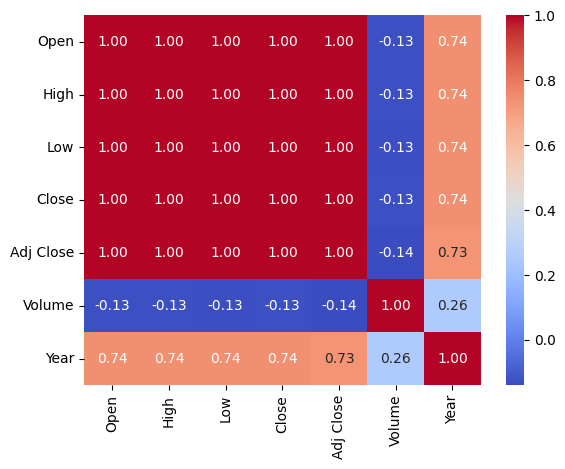

In [126]:
# Visualisation
plot_graph(before_covid, features = ['Open', 'Close'])
correlation_matrix4 = before_covid.corr()
sns.heatmap(correlation_matrix4, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

**LSTM**

Actual feature data shape  : (10408, 2, 1)
Actual target data shape   : (10408,)
Training feature data shape: (8327, 2, 1)
Training target data shape : (8327,)
Testing feature data shape : (2081, 2, 1)
Testing target data shape  : (2081,)
LSTM Model Summary: 


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2082/2082 - 6s - 3ms/step - loss: 0.0035
Epoch 2/50
2082/2082 - 4s - 2ms/step - loss: 5.2905e-04
Epoch 3/50
2082/2082 - 4s - 2ms/step - loss: 1.3715e-04
Epoch 4/50
2082/2082 - 4s - 2ms/step - loss: 6.7313e-05
Epoch 5/50
2082/2082 - 4s - 2ms/step - loss: 3.0421e-05
Epoch 6/50
2082/2082 - 4s - 2ms/step - loss: 2.5496e-05
Epoch 7/50
2082/2082 - 4s - 2ms/step - loss: 2.8132e-05
Epoch 8/50
2082/2082 - 4s - 2ms/step - loss: 2.4702e-05
Epoch 9/50
2082/2082 - 4s - 2ms/step - loss: 2.8867e-05
Epoch 10/50
2082/2082 - 4s - 2ms/step - loss: 3.0423e-05
Epoch 11/50
2082/2082 - 4s - 2ms/step - loss: 3.3692e-05
Epoch 12/50
2082/2082 - 4s - 2ms/step - loss: 4.0385e-05
Epoch 13/50
2082/2082 - 4s - 2ms/step - loss: 3.4204e-05
Epoch 14/50
2082/2082 - 4s - 2ms/step - loss: 3.4988e-05
Epoch 15/50
2082/2082 - 4s - 2ms/step - loss: 3.3400e-05
Epoch 16/50
2082/2082 - 4s - 2ms/step - loss: 3.0191e-05
Epoch 17/50
2082/2082 - 6s - 3ms/step - loss: 3.2298e-05
Epoch 18/50
2082/2082 - 5s - 2ms/step -

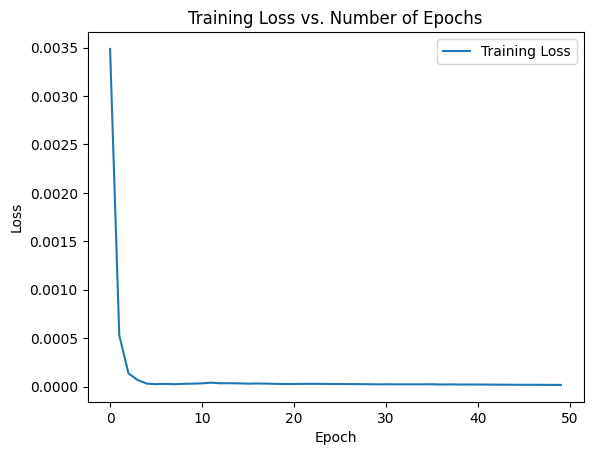

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RMSE: 3.0428769209078874
MAPE: 0.5977005482362874


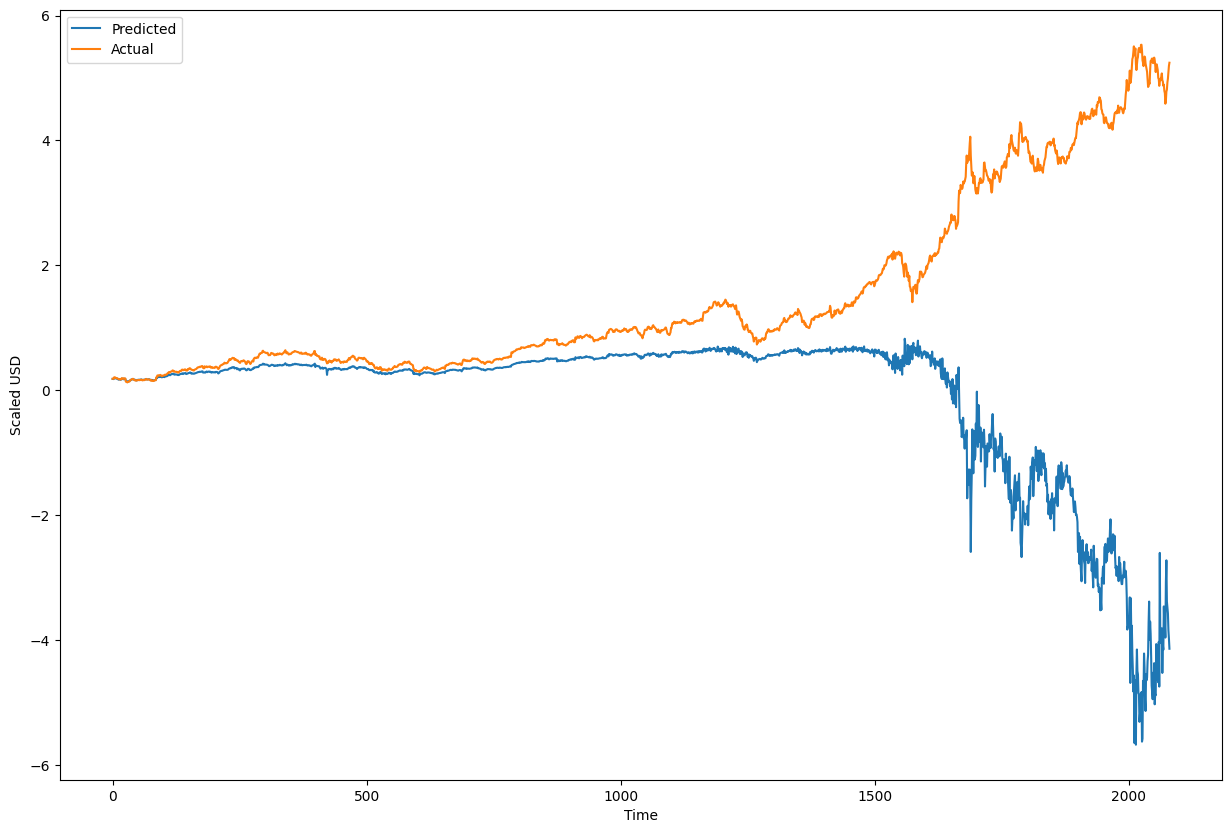

In [127]:
bc_lstm, bc_Y_pred, bc_Y_test = predict_lstm(before_covid)
plot_predicted_vs_actual(bc_Y_pred,bc_Y_test)

Actual feature data shape  : (10400, 10, 1)
Actual target data shape   : (10400,)
Training feature data shape: (8320, 10, 1)
Training target data shape : (8320,)
Testing feature data shape : (2080, 10, 1)
Testing target data shape  : (2080,)
LSTM Model Summary: 


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2080/2080 - 7s - 3ms/step - loss: 0.0017
Epoch 2/50
2080/2080 - 5s - 2ms/step - loss: 5.7628e-04
Epoch 3/50
2080/2080 - 5s - 3ms/step - loss: 3.0102e-04
Epoch 4/50
2080/2080 - 5s - 3ms/step - loss: 1.5271e-04
Epoch 5/50
2080/2080 - 5s - 2ms/step - loss: 1.2655e-04
Epoch 6/50
2080/2080 - 6s - 3ms/step - loss: 1.2750e-04
Epoch 7/50
2080/2080 - 6s - 3ms/step - loss: 1.1183e-04
Epoch 8/50
2080/2080 - 6s - 3ms/step - loss: 9.3445e-05
Epoch 9/50
2080/2080 - 6s - 3ms/step - loss: 9.7175e-05
Epoch 10/50
2080/2080 - 6s - 3ms/step - loss: 9.2578e-05
Epoch 11/50
2080/2080 - 5s - 3ms/step - loss: 8.7220e-05
Epoch 12/50
2080/2080 - 5s - 3ms/step - loss: 8.4489e-05
Epoch 13/50
2080/2080 - 6s - 3ms/step - loss: 8.1857e-05
Epoch 14/50
2080/2080 - 5s - 3ms/step - loss: 7.3544e-05
Epoch 15/50
2080/2080 - 5s - 3ms/step - loss: 7.0784e-05
Epoch 16/50
2080/2080 - 6s - 3ms/step - loss: 6.5542e-05
Epoch 17/50
2080/2080 - 11s - 5ms/step - loss: 5.8673e-05
Epoch 18/50
2080/2080 - 6s - 3ms/step 

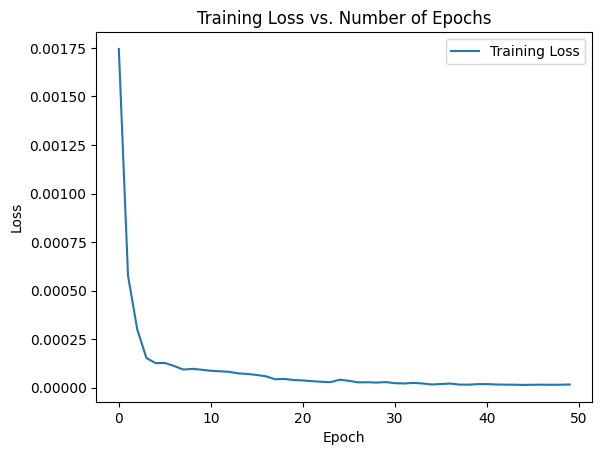

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE: 0.8771009664021111
MAPE: 0.39673948060539094


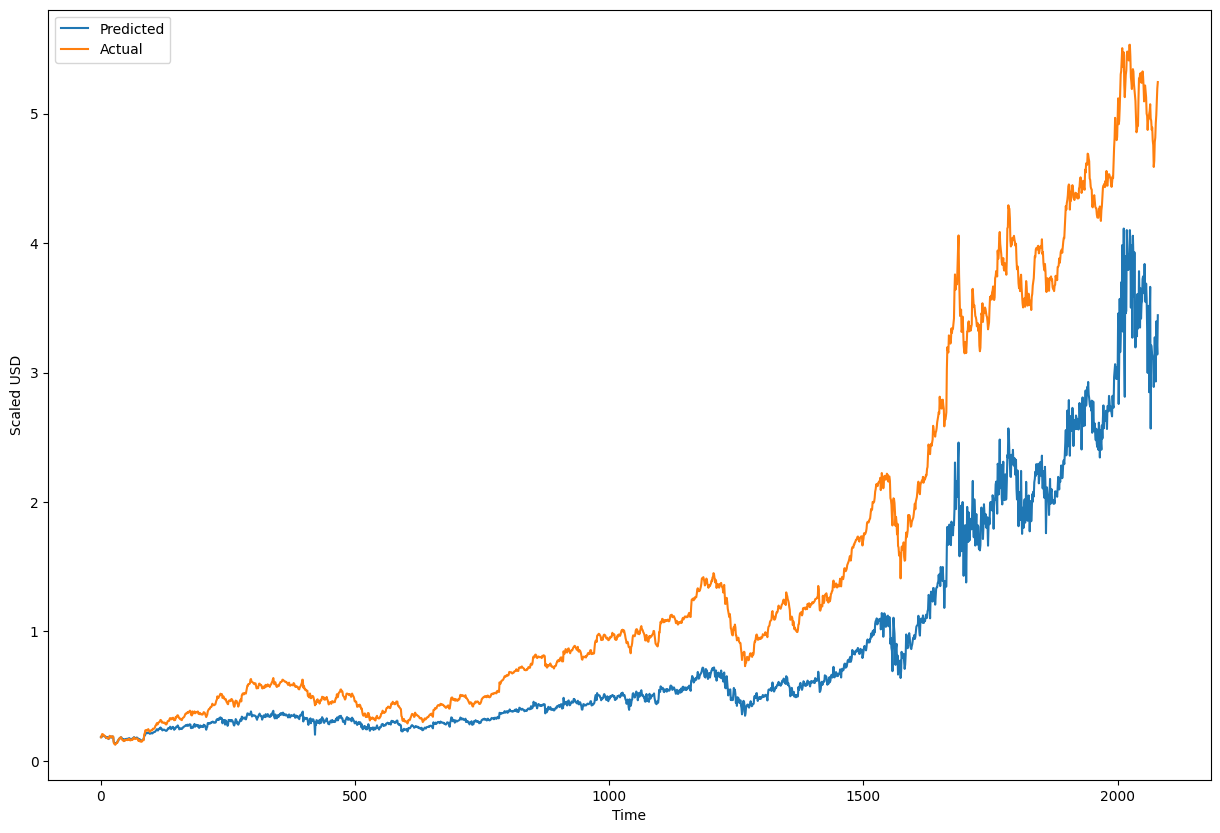

In [128]:
bc_lstm1, bc_Y_pred1, bc_Y_test1 = predict_lstm(before_covid,n_steps = 10)
plot_predicted_vs_actual(bc_Y_pred1,bc_Y_test1)

**SMA**

Test RMSE: 18.205
Test MAPE: 0.352


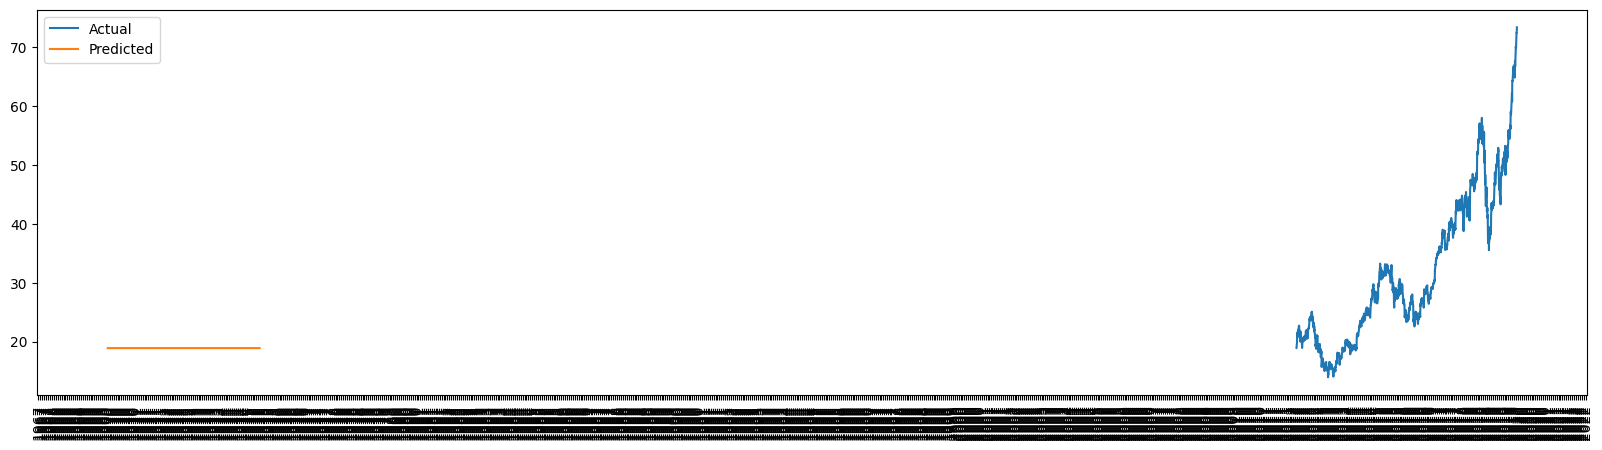

In [175]:
predict_sma(before_covid)

**EMA**

Test RMSE: 18.177
Test MAPE: 0.351


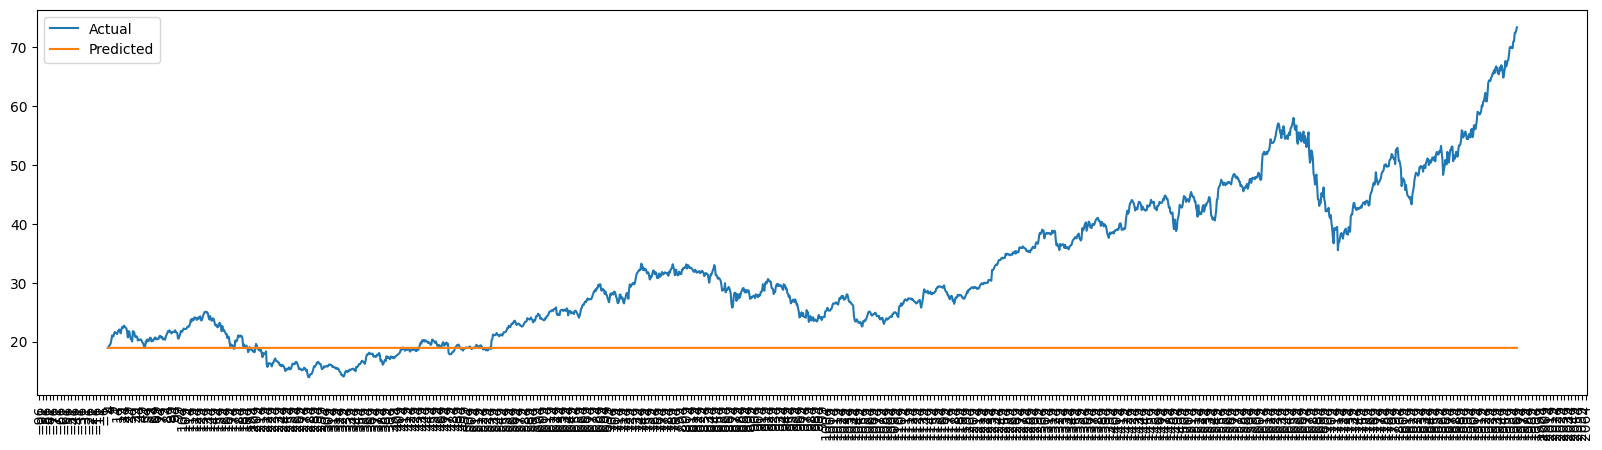

In [130]:
predict_ema(before_covid)

**After COVID-19 years data (2020-2022)**

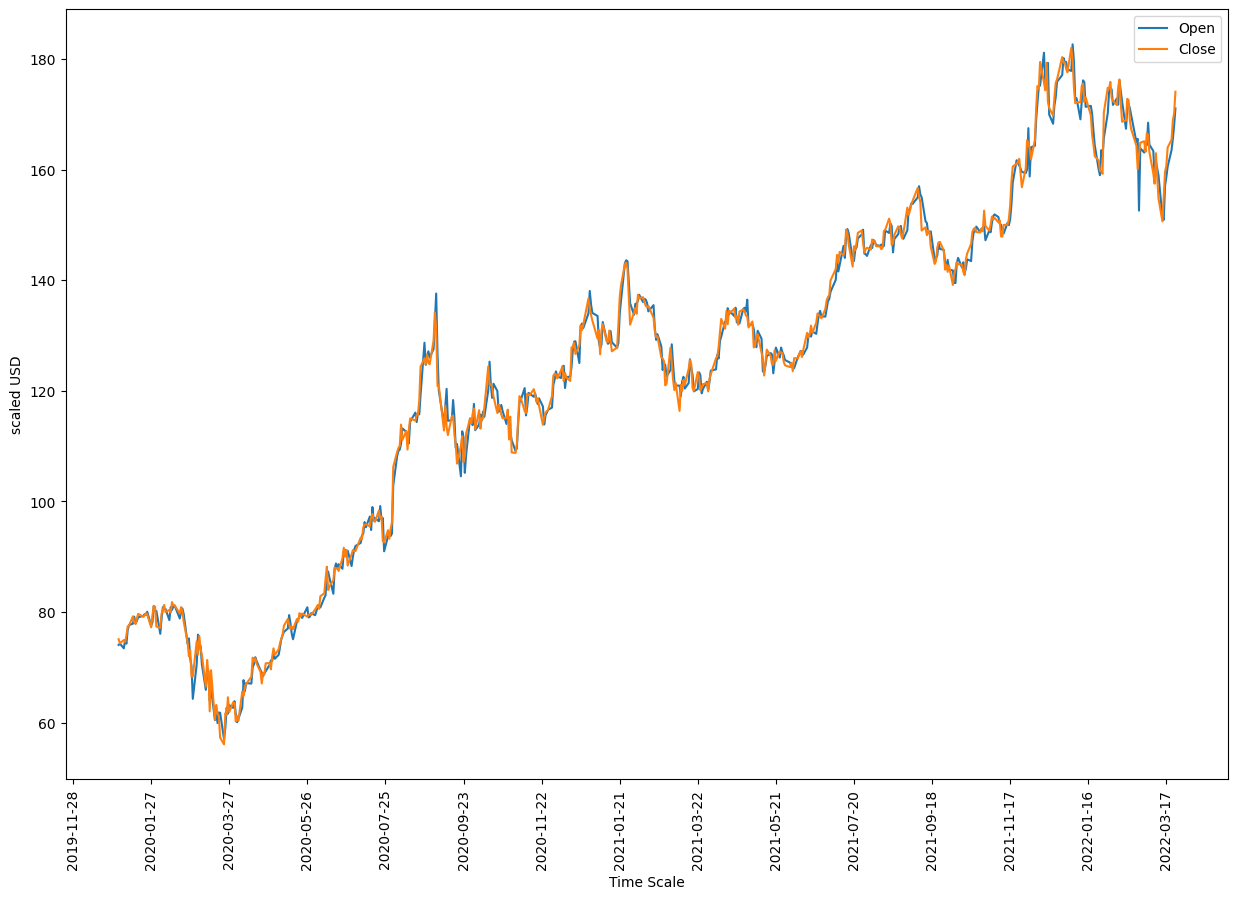

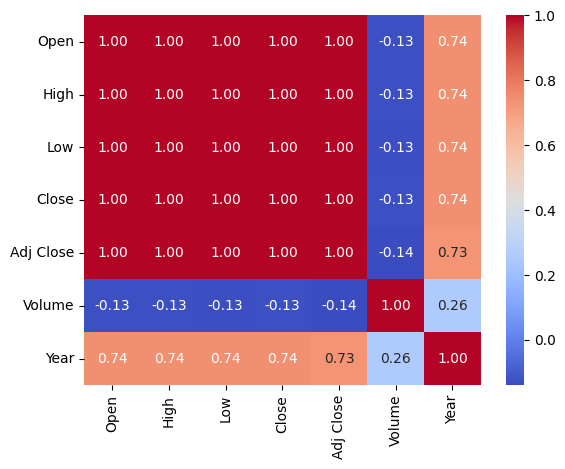

In [131]:
# Visualisation
plot_graph(after_covid, features = ['Open', 'Close'])
correlation_matrix5 = before_covid.corr()
sns.heatmap(correlation_matrix5, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

**LSTM**

Actual feature data shape  : (10408, 2, 1)
Actual target data shape   : (10408,)
Training feature data shape: (8327, 2, 1)
Training target data shape : (8327,)
Testing feature data shape : (2081, 2, 1)
Testing target data shape  : (2081,)
LSTM Model Summary: 


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2082/2082 - 5s - 3ms/step - loss: 0.0056
Epoch 2/50
2082/2082 - 4s - 2ms/step - loss: 7.9759e-04
Epoch 3/50
2082/2082 - 5s - 2ms/step - loss: 1.3954e-04
Epoch 4/50
2082/2082 - 4s - 2ms/step - loss: 5.3728e-05
Epoch 5/50
2082/2082 - 4s - 2ms/step - loss: 2.6441e-05
Epoch 6/50
2082/2082 - 3s - 1ms/step - loss: 2.1699e-05
Epoch 7/50
2082/2082 - 3s - 1ms/step - loss: 2.0487e-05
Epoch 8/50
2082/2082 - 3s - 1ms/step - loss: 2.1761e-05
Epoch 9/50
2082/2082 - 3s - 1ms/step - loss: 2.4389e-05
Epoch 10/50
2082/2082 - 5s - 2ms/step - loss: 2.9631e-05
Epoch 11/50
2082/2082 - 3s - 1ms/step - loss: 3.5133e-05
Epoch 12/50
2082/2082 - 2s - 1ms/step - loss: 3.8461e-05
Epoch 13/50
2082/2082 - 3s - 1ms/step - loss: 3.8011e-05
Epoch 14/50
2082/2082 - 2s - 1ms/step - loss: 3.8358e-05
Epoch 15/50
2082/2082 - 3s - 1ms/step - loss: 3.6561e-05
Epoch 16/50
2082/2082 - 5s - 2ms/step - loss: 3.5515e-05
Epoch 17/50
2082/2082 - 3s - 1ms/step - loss: 3.5222e-05
Epoch 18/50
2082/2082 - 3s - 1ms/step -

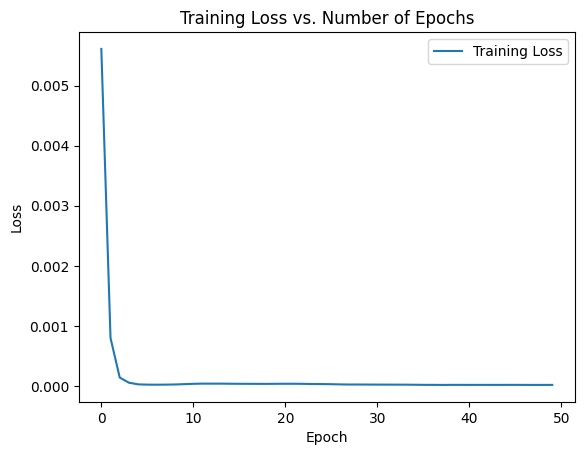

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RMSE: 2.485345968118374
MAPE: 0.5453419154082868


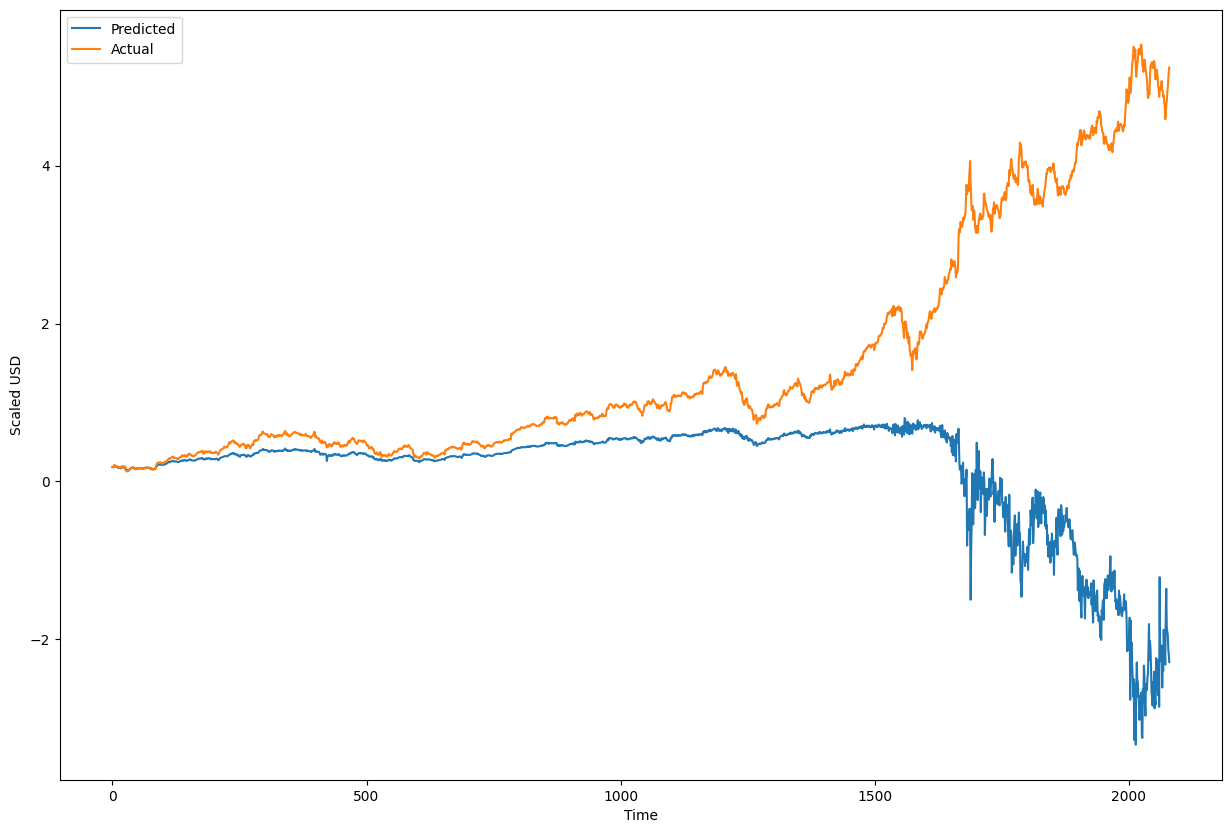

In [132]:
ac_lstm, ac_Y_pred, ac_Y_test = predict_lstm(after_covid)
plot_predicted_vs_actual(ac_Y_pred,ac_Y_test)

Actual feature data shape  : (10400, 10, 1)
Actual target data shape   : (10400,)
Training feature data shape: (8320, 10, 1)
Training target data shape : (8320,)
Testing feature data shape : (2080, 10, 1)
Testing target data shape  : (2080,)
LSTM Model Summary: 


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
2080/2080 - 6s - 3ms/step - loss: 0.0015
Epoch 2/50
2080/2080 - 4s - 2ms/step - loss: 4.6142e-04
Epoch 3/50
2080/2080 - 4s - 2ms/step - loss: 2.4772e-04
Epoch 4/50
2080/2080 - 4s - 2ms/step - loss: 1.2827e-04
Epoch 5/50
2080/2080 - 6s - 3ms/step - loss: 1.1541e-04
Epoch 6/50
2080/2080 - 5s - 3ms/step - loss: 1.0972e-04
Epoch 7/50
2080/2080 - 6s - 3ms/step - loss: 9.5018e-05
Epoch 8/50
2080/2080 - 6s - 3ms/step - loss: 9.0537e-05
Epoch 9/50
2080/2080 - 11s - 5ms/step - loss: 7.6464e-05
Epoch 10/50
2080/2080 - 6s - 3ms/step - loss: 7.5395e-05
Epoch 11/50
2080/2080 - 6s - 3ms/step - loss: 6.6174e-05
Epoch 12/50
2080/2080 - 5s - 2ms/step - loss: 6.5767e-05
Epoch 13/50
2080/2080 - 5s - 2ms/step - loss: 5.5890e-05
Epoch 14/50
2080/2080 - 6s - 3ms/step - loss: 4.8406e-05
Epoch 15/50
2080/2080 - 10s - 5ms/step - loss: 4.0782e-05
Epoch 16/50
2080/2080 - 5s - 3ms/step - loss: 2.8738e-05
Epoch 17/50
2080/2080 - 5s - 3ms/step - loss: 2.4309e-05
Epoch 18/50
2080/2080 - 5s - 3ms/step

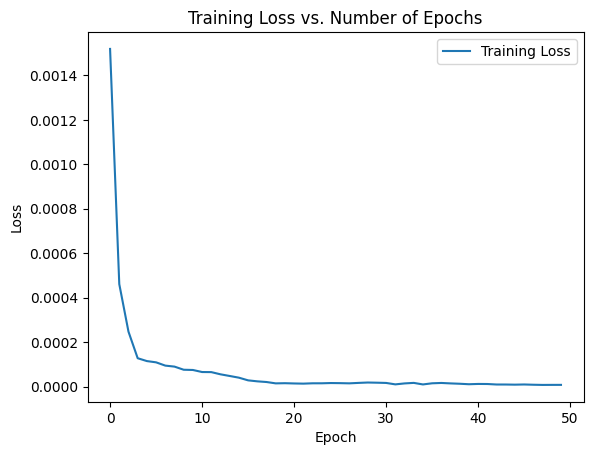

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE: 5.240063640056124
MAPE: 0.9528504405682611


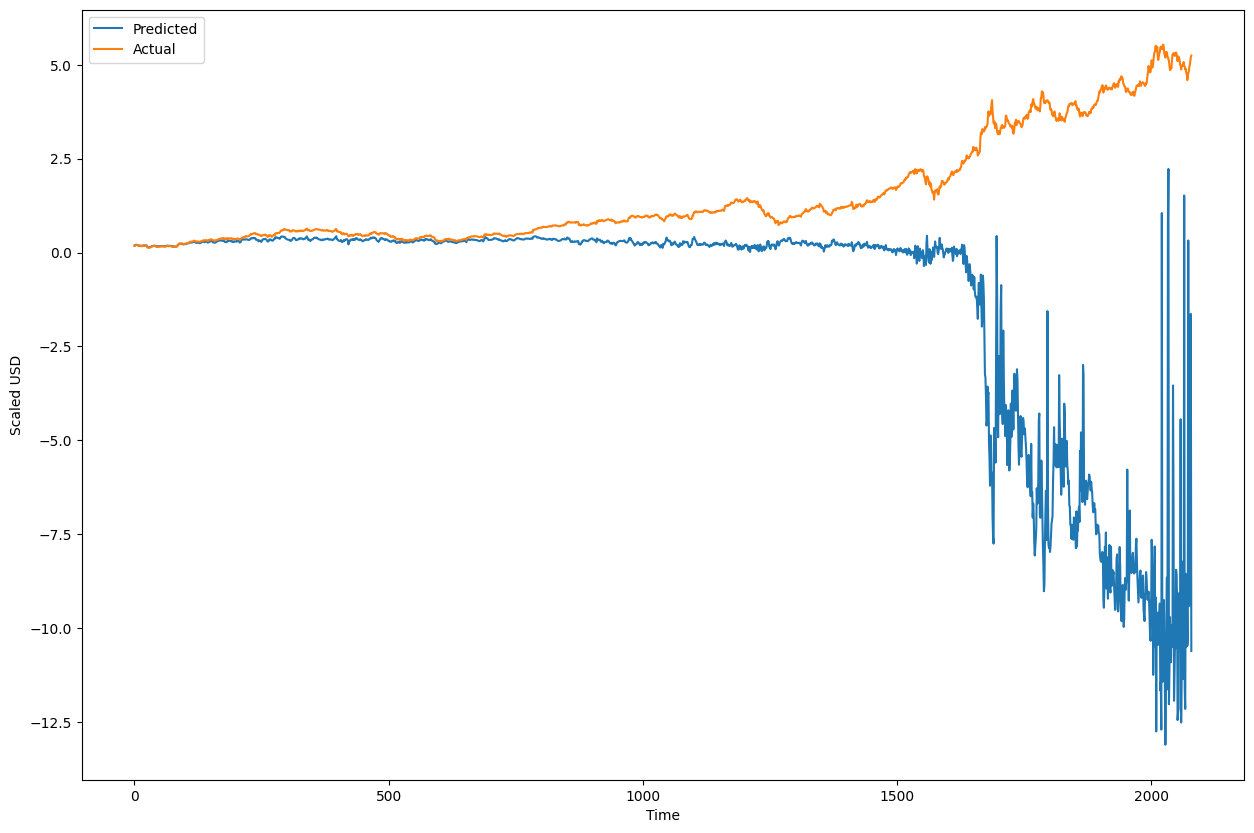

In [133]:
ac_lstm1, ac_Y_pred1, ac_Y_test1 = predict_lstm(after_covid,n_steps = 10)
plot_predicted_vs_actual(ac_Y_pred1,ac_Y_test1)

**SMA**

Test RMSE: 24.535
Test MAPE: 0.133


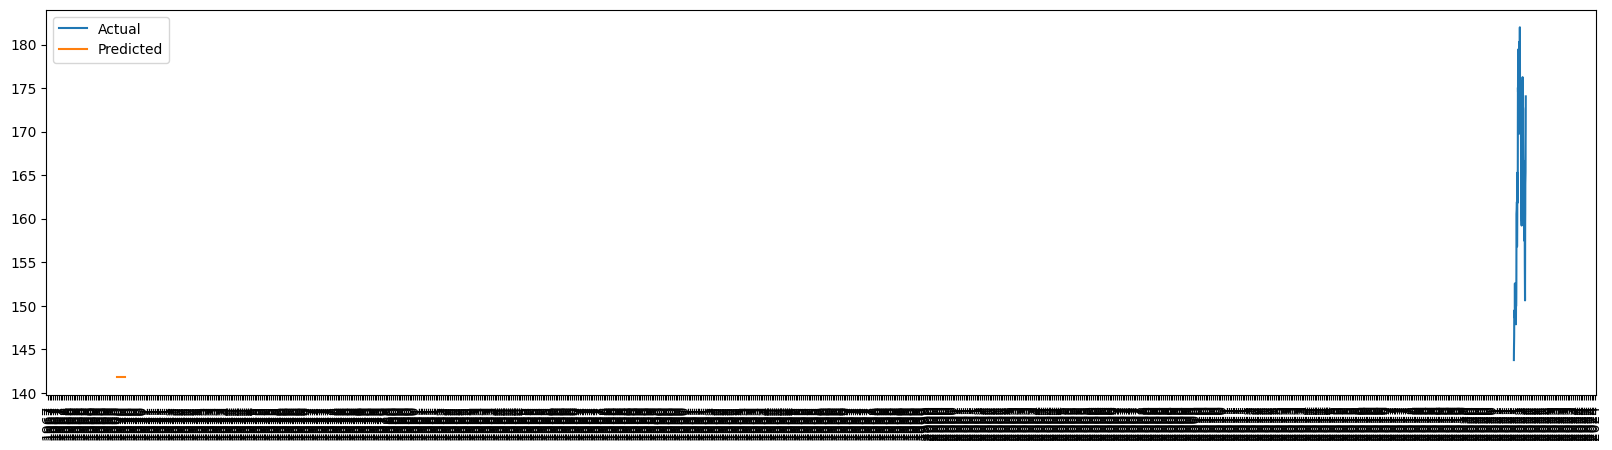

In [177]:
predict_sma(after_covid)

**EMA**

Test RMSE: 24.173
Test MAPE: 0.130


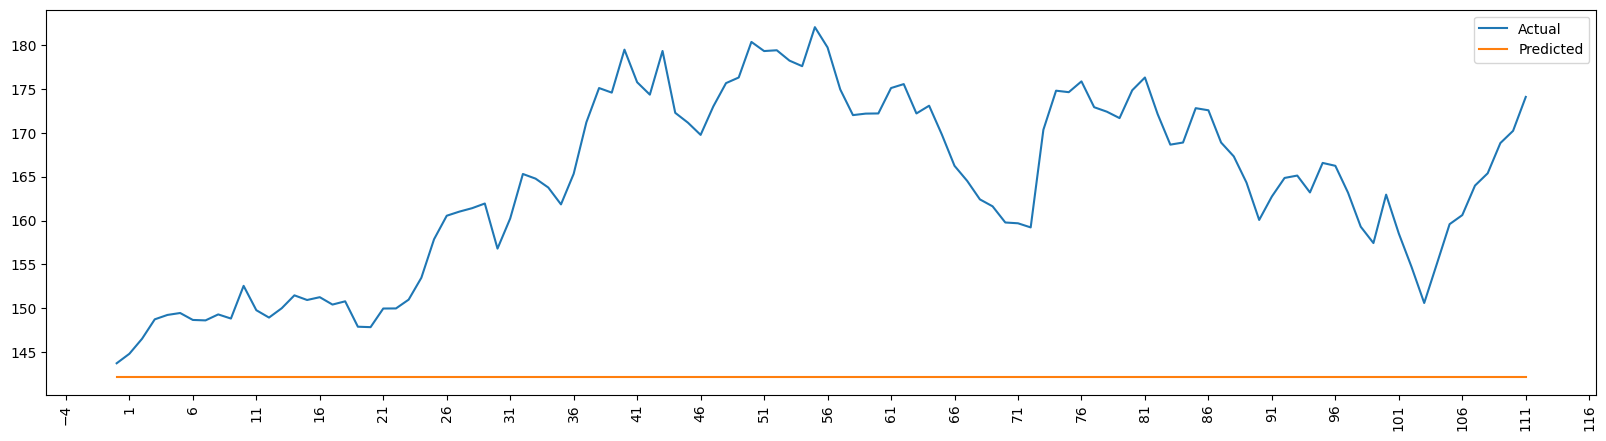

In [179]:
predict_ema(after_covid)